# <center><bold><h1 style="font-family:verdana;">Health Status Indicators

<h1 style="color:blue;">Contents of the Report:</h1>


    1.Project Introduction -> Goal of the project
    2.Expected Outcome
    3.About The Data
    4.Updations/Changes to the Goals of the project
    5.Data Cleaning Measures
    6.Data Dictionary
    7.Exploratory Data Analysis (Study of all the files)
    8.Modeling & Inferencing 
    9.Reflection
    10.Next Steps
    

<center> <h1 style="color:blue;">1. Project Introduction : Goal of the Project</h1> </center>

    1. Understand how behavioural factors such as obesity, tobacco use, diet and physical activity, drugs and alcohol usage and others contribute to deaths and analysing all health status indicators and understanding what affects it at the county level.
    2.Improve quality of life and reduce risk of illness by exploring the causes of physical and mental health and providing evidence for local health agencies to help them prioritise their work. 
    3.Utilizing Health Status Indicators to promote public health and combat obesity, heart disease and cancer. 
    4.Using Predictive Modeling for leading causes of death like Lung Cancer, Breast Cancer, Colon Cancer, Poverty, Heart Diseases etc using various feature selection techniques.
    5.The State of Illinois specific analysis using clustering technqiues and grouping them according to their health- risk levels.

<center> <h1 style="color:blue;">2. Expected Outcome</h1> </center>



    1.After exploratory data analysis, a one-time project report to be prepared providing insights and measures to be taken to improve healthcare across the country
    2.Predictive Analytics to be done using Machine Learning based models to provide and assist with evidence based decisions for better healthcare on Leading Causes of Death like Diabetes, Cancer, Heart Diseases etc.
    
    
   <bold><font color='red'>Results envisioned:</bold></font>  
   
    3.Flow of information and using statistics to translate data into actions for the improvement of the community health
    4.Another tool to local public health agencies for improving their community’s health and help them prioritise work.
    5.Provide insights to assist in the development of public policies and health programs, interventions and prioritise funding in the most effective pathway.
    5.Monitor health status, spread awareness about the issues affecting the health, Support research for innovative solutions to health issues and Personalized treatment and informed care

<center> <h1 style="color:blue;">3. About the Data</h1> </center>


HEALTHY_PEOPLE_2010.csv (Healthy People 2010 Targets and the U.S. Percentages or Rates)

DEMOGRAPHICS.csv (Demographics indicator domain) 			                                         3141 rows, 44 columns

LEADING_CAUSES_OF_DEATH.csv (Leading Causes of Death indicator domain) 					             3000+ rows, 235 columns

SUMMARY_MEASURES_OF_HEALTH.csv (Summary Measures of Health indicator domain)                         3141 rows, 141 columns
 						              	             	 	
MEASURES_OF_BIRTH_AND_DEATH.csv (Measures of Birth and Death indicator domain)                       3000+ rows, 141 columns

RELATIVE_HEALTH_IMPORTANCE. (Relative Health Importance indicator domain)                             3141 rows, 28 columns
									             
VULNERABLE_POPS_AND_ENV_HEALTH.csv (Vulnerable Populations and Environmental Health indicator domain) 3141 rows, 28 columns							             
PREVENTIVE_SERVICES_USE. (Preventive Services indicator domain) 	                                  3141 rows, 43 columns

RISK_FACTORS_AND_ACCESS_TO_CARE.csv (Risk Factors and Access to Care indicator domain)                3141 rows, 31 columns


<center> <h1 style="color:blue;">4. Goals Updated</h1> </center>


The broad goals of predicting heart disease, obesity and cancer to imporve healthcare have been included with other leading causes of death and average life expectancy attribute. We still strive to provide as much useful insights as possible from the dataset to spread awareness about general issues pertaining to health.

A number of dependent variables were added which are considered important and might be beneficial
to the local health agencies.

    1.Average Life Expectancy
    2.Diabetes
    3.Lung Cancer, Breast Cancer, Colon Cancer
    4.Strokes, Coronory Heart Disease
    5.Suicides
- We intend to give correlations of each of the above attribute with other attributes in the dataset and find actionable insights.
- We intend to determine the important factors which are responsible or have correlation for higher values for each of the attributes.
- We intend to increase the accuracy of machine learning models to have better accuracy power.

<center> <h1 style="color:blue;">5. About Data Cleaning</h1> </center>


A data dump was picked up from the link below in a zip file consisting of 10 csvs. The data dump consisted of the data dictionary as well as the description of the default values therein.
    1. All missing values and default values were replaced to nan or handled appropriately for plotting purposes.
    Default Values= [-9999,-2222,-2222.2,-2,-1111.1,-1111,-1,-9998.9]
    2.During Modeling Phase missing values in all numerical attributes were replaced by the mean of the column


In [75]:
#importing all the libraries
import os
from os import listdir
from os.path import isfile, join
import struct
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
import gzip
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [76]:
mypath=r'D:\Drive\Coursework\IDS\Project_IDS\Dataset'
os.chdir(mypath)
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['CHSI DataSet.xls',
 'ColstoUse.csv',
 'CSV File Index.txt',
 'DATAELEMENTDESCRIPTION.csv',
 'DEFINEDDATAVALUE.csv',
 'DEMOGRAPHICS.csv',
 'HEALTHYPEOPLE2010.csv',
 'LEADINGCAUSESOFDEATH.csv',
 'MEASURESOFBIRTHANDDEATH.csv',
 'PREVENTIVESERVICESUSE.csv',
 'PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df.csv',
 'RELATIVEHEALTHIMPORTANCE.csv',
 'RISKFACTORSANDACCESSTOCARE.csv',
 'SUMMARYMEASURESOFHEALTH.csv',
 'VUNERABLEPOPSANDENVHEALTH.csv']

<center> <h1 style="color:blue;">6. Data Dictonary</h1> </center>


In [92]:
pd.set_option("display.max_rows", None)
DD=pd.read_csv('DATAELEMENTDESCRIPTION.csv')
DD=DD[['PAGE_NAME','COLUMN_NAME','DESCRIPTION','IS_PERCENT_DATA']]

ColstoUse=pd.read_csv('ColstoUse.csv')
DD=DD[DD['COLUMN_NAME'].isin(list(ColstoUse['Cols']))]
DD


PAGE_NAME          COLUMN_NAME  \
0                  Demographics      State_FIPS_Code   
1                  Demographics     County_FIPS_Code   
2                  Demographics     CHSI_County_Name   
3                  Demographics      CHSI_State_Name   
4                  Demographics      CHSI_State_Abbr   
5                  Demographics     Strata_ID_Number   
8                  Demographics      Population_Size   
11                 Demographics   Population_Density   
14                 Demographics              Poverty   
17                 Demographics         Age_19_Under   
20                 Demographics            Age_19_64   
23                 Demographics            Age_65_84   
26                 Demographics      Age_85_and_Over   
29                 Demographics                White   
32                 Demographics                Black   
35                 Demographics      Native_American   
38                 Demographics                Asian   
41                 Demographics             Hispanic   
44      SummaryMeasuresOfHealth      State_FIPS_Code   
45      SummaryMeasuresOfHealth     County_FIPS_Code   
46      SummaryMeasuresOfHealth     CHSI_County_Name   
47      SummaryMeasuresOfHealth      CHSI_State_Name   
48      SummaryMeasuresOfHealth      CHSI_State_Abbr   
49      SummaryMeasuresOfHealth     Strata_ID_Number   
50      SummaryMeasuresOfHealth                  ALE   
54      SummaryMeasuresOfHealth            All_Death   
60      SummaryMeasuresOfHealth        Health_Status   
66      SummaryMeasuresOfHealth       Unhealthy_Days   
72         LeadingCausesOfDeath      State_FIPS_Code   
73         LeadingCausesOfDeath     County_FIPS_Code   
74         LeadingCausesOfDeath     CHSI_County_Name   
75         LeadingCausesOfDeath      CHSI_State_Name   
76         LeadingCausesOfDeath      CHSI_State_Abbr   
77         LeadingCausesOfDeath     Strata_ID_Number   
307     MeasuresOfBirthAndDeath      State_FIPS_Code   
308     MeasuresOfBirthAndDeath     County_FIPS_Code   
309     MeasuresOfBirthAndDeath     CHSI_County_Name   
310     MeasuresOfBirthAndDeath      CHSI_State_Name   
311     MeasuresOfBirthAndDeath      CHSI_State_Abbr   
312     MeasuresOfBirthAndDeath     Strata_ID_Number   
313     MeasuresOfBirthAndDeath                  LBW   
319     MeasuresOfBirthAndDeath                 VLBW   
325     MeasuresOfBirthAndDeath            Premature   
331     MeasuresOfBirthAndDeath             Under_18   
337     MeasuresOfBirthAndDeath              Over_40   
343     MeasuresOfBirthAndDeath            Unmarried   
349     MeasuresOfBirthAndDeath            Late_Care   
355     MeasuresOfBirthAndDeath     Infant_Mortality   
379     MeasuresOfBirthAndDeath          IM_Neonatal   
385     MeasuresOfBirthAndDeath      IM_Postneonatal   
391     MeasuresOfBirthAndDeath          Brst_Cancer   
397     MeasuresOfBirthAndDeath           Col_Cancer   
403     MeasuresOfBirthAndDeath                  CHD   
409     MeasuresOfBirthAndDeath             Homicide   
415     MeasuresOfBirthAndDeath          Lung_Cancer   
421     MeasuresOfBirthAndDeath                  MVA   
427     MeasuresOfBirthAndDeath               Stroke   
433     MeasuresOfBirthAndDeath              Suicide   
439     MeasuresOfBirthAndDeath               Injury   
445     MeasuresOfBirthAndDeath         Total_Births   
446     MeasuresOfBirthAndDeath         Total_Deaths   
448    RelativeHealthImportance      State_FIPS_Code   
449    RelativeHealthImportance     County_FIPS_Code   
450    RelativeHealthImportance     CHSI_County_Name   
451    RelativeHealthImportance      CHSI_State_Name   
452    RelativeHealthImportance      CHSI_State_Abbr   
453    RelativeHealthImportance     Strata_ID_Number   
476   VunerablePopsAndEnvHealth      State_FIPS_Code   
477   VunerablePopsAndEnvHealth     County_FIPS_Code   
478   VunerablePopsAndEnvHealth     CHSI_County_Name   
479   VunerablePopsAndEnvHealth      CHSI_Stat

# Features Used 
<font size="3"> Predictor Attributes:</font>

<font size="2">
 'No_Exercise',
 'Few_Fruit_Veg',
 'Obesity',
 'High_Blood_Pres',
 'Smoker',
 'Uninsured',
 'Elderly_Medicare',
 'Disabled_Medicare',
 'Prim_Care_Phys_Rate',
 'Dentist_Rate',
 'FluB_Rpt',
 'HepA_Rpt',
 'HepB_Rpt',
 'Meas_Rpt',
 'Pert_Rpt',
 'CRS_Rpt',
 'Syphilis_Rpt',
 'FluB_Rpt%',
 'HepA_Rpt%',
 'HepB_Rpt%',
 'Meas_Rpt%',
 'Pert_Rpt%',
 'CRS_Rpt%',
 'Syphilis_Rpt%',
 'Pap_Smear',
 'Mammogram',
 'Proctoscopy',
 'Pneumo_Vax',
 'Flu_Vac',
 'Pap_Smear%',
 'Mammogram%',
 'Proctoscopy%',
 'Pneumo_Vax%',
 'Flu_Vac%',
 'Population_Size',
 'Population_Density',
 'Poverty',
 'Age_19_Under',
 'Age_19_64',
 'Age_65_84',
 'Age_85_and_Over',
 'White',
 'Black',
 'Native_American',
 'Asian',
 'Hispanic',
 'No_HS_Diploma',
 'No_HS_Diploma%',
 'Unemployed',
 'Unemployed%',
 'Sev_Work_Disabled',
 'Sev_Work_Disabled%',
 'Major_Depression',
 'Major_Depression%',
 'Recent_Drug_Use',
 'Recent_Drug_Use%',
 'Ecol_Rpt',
 'Salm_Rpt',
 'Shig_Rpt',
 'Toxic_Chem',
 'All_Death',
 'Health_Status',
 'Unhealthy_Days',
 'LBW',
 'VLBW',
 'Premature',
 'Under_18',
 'Total_Births',
 'Total_Deaths',
 'Total_Births%',
 'Total_Deaths%',
 'Over_40',
 'Unmarried',
 'Late_Care',
 'Infant_Mortality',
 'IM_Neonatal',
 'IM_Postneonatal'
 'Homicide',
 'Homicide%'
    
    
    
    
    
    
    
    
 <font size="3">
     
     
Dependent Attributes:</font>
  <font size="2">
 
      
 'ALE',
 'Diabetes',
 'Lung_Cancer',
 'Brst_Cancer',
 'Col_Cancer',
 'MVA',
 'Stroke', 
 'Suicide',
 'Injury',
  'CHD'

<center> <h1 style="color:blue;">7. Exploratory Data Analysis</h1> </center>

We import and study the attributes of every file and then merge them on the basis of the primary keys like
'State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number'.

    1.The Data Granularity is of a county level.
    2.Each row represents various values in percentages/or numeric of a particular county of a particular state.
    3.The scope of the dataset is entire population of United States of America.

# Demographics

In [77]:
df_Demog=pd.read_csv('DEMOGRAPHICS.csv')
#df_Demog=df_Demog.loc[df_Demog['CHSI_State_Name']=='Illinois']
#df_Demog.columns
df_Demog=df_Demog[['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number','Population_Size','Population_Density','Poverty','Age_19_Under','Age_19_64', 'Age_65_84','Age_85_and_Over','White','Black', 'Native_American','Asian', 'Hispanic']]
ListofNans=[-9999,-2222,-2222.2,-2,-1111.1,-1111,-1,-9998.9]
df_Demog=df_Demog.replace([i for i in ListofNans], np.NAN)#replacing odd values with nan
df_Demog.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0                1                 1          Autauga         Alabama   
1                1                 3          Baldwin         Alabama   
2                1                 5          Barbour         Alabama   
3                1                 7             Bibb         Alabama   
4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  Population_Size  Population_Density  \
0              AL                29            48612                82.0   
1              AL                16           162586               102.0   
2              AL                51            28414                32.0   
3              AL                42            21516                35.0   
4              AL                28            55725                86.0   

   Poverty  Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over  White  Black  \
0     10.4          26.9       62.3        9.8              0.9   80.7   17.3   
1     10.2          23.5       60.3       14.5              1.8   88.4    9.9   
2     22.1          24.3       62.5       11.6              1.6   52.2   46.8   
3     16.8          24.6       63.3       10.9              1.2   76.8   22.5   
4     11.9          24.5       62.1       12.1              1.3   97.1    1.5   

   Native_American  Asian  Hispanic  
0              0.5    0.6       1.7  
1              0.5    0.4       2.3  
2              0.4    0.3       3.1  
3              0.3    0.1       1.4  
4              0.5    0.2       6.3

###### Granularity : Every record in the dataframe is a record of one county in the US

In [78]:
PovertyStats=df_Demog['Poverty'].describe()
print("Poverty Across Counties Stats\n\n ",PovertyStats)

Poverty Across Counties Stats

  count    3140.000000
mean       13.350159
std         4.883308
min         2.200000
25%         9.800000
50%        12.600000
75%        16.200000
max        36.200000
Name: Poverty, dtype: float64


In [82]:
Races_df=df_Demog[['White','Black','Asian', 'Hispanic']]
print("Races \n\n",Races_df.describe())

Races 

              White        Black        Asian     Hispanic
count  3141.000000  3141.000000  3141.000000  3141.000000
mean     87.017892     8.986692     1.123050     7.017988
std      16.150479    14.545659     2.757237    12.464727
min       4.700000     0.000000     0.000000     0.000000
25%      82.800000     0.500000     0.300000     1.100000
50%      94.100000     2.100000     0.500000     2.300000
75%      97.600000    10.300000     1.000000     6.300000
max     100.000000    86.000000    55.900000    97.500000


Text(0.5, 1.0, 'Boxplot showing races which are apporimately equal in proportion (whites excluded)')

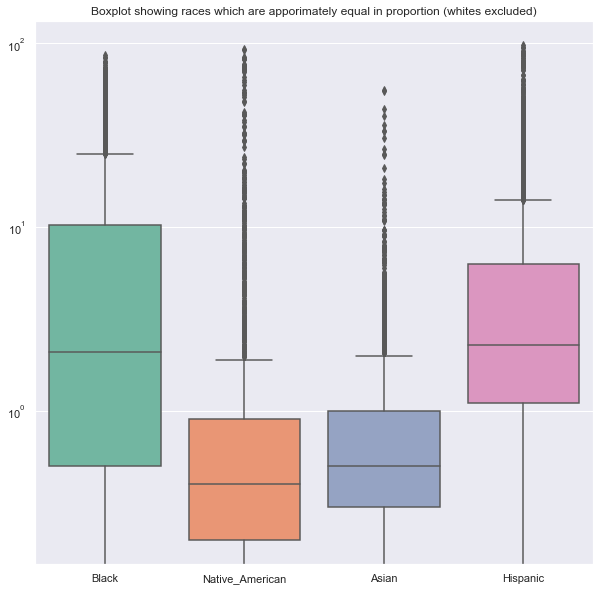

In [86]:
ax = sns.boxplot(data=df_Demog[['Black', 'Native_American','Asian', 'Hispanic']], palette="Set2")
ax.set_yscale('log')
ax.set_title('Boxplot showing races which are apporimately equal in proportion (whites excluded)')

In [87]:
Ages_df=df_Demog[['Age_19_Under','Age_19_64', 'Age_65_84','Age_85_and_Over']]
print("Age Groups \n\n",Ages_df.describe())

Age Groups 

        Age_19_Under    Age_19_64    Age_65_84  Age_85_and_Over
count   3141.000000  3141.000000  3141.000000      3141.000000
mean      24.806527    60.289398    12.789430         2.115409
std        3.281777     3.356056     3.334035         0.949119
min        1.400000    47.600000     2.100000         0.100000
25%       22.700000    58.300000    10.700000         1.500000
50%       24.600000    60.300000    12.500000         1.900000
75%       26.400000    62.300000    14.700000         2.600000
max       47.200000    83.300000    29.200000         7.600000


In [88]:
Race_Age=df_Demog[['White','Black','Asian', 'Hispanic','Age_19_Under','Age_19_64', 'Age_65_84','Age_85_and_Over']]
Race_AgeCorr=pd.DataFrame(Race_Age.corr())
Race_AgeCorr=Race_AgeCorr[Race_AgeCorr.index.isin(['White','Black','Asian', 'Hispanic'])]
Race_AgeCorr=Race_AgeCorr[['Age_19_Under','Age_19_64', 'Age_65_84','Age_85_and_Over']]
print(Race_AgeCorr)

          Age_19_Under  Age_19_64  Age_65_84  Age_85_and_Over
White        -0.369316  -0.042609   0.319331         0.305791
Black         0.211044   0.064710  -0.207554        -0.228924
Asian         0.033618   0.254596  -0.251417        -0.132692
Hispanic      0.377215  -0.166735  -0.155450        -0.167781


### The table represents the correlation values among the features. We See races except "White" to be negatively correlated with the age groups of 19 and above. 
Counties in which older age populations are there in more percentages have lower number of blacks, asians and hispanics, i.e. they are negatively correlated to the higher ages

    1.Can we infer that these races tend to live in the counties which have much younger populations? 
    2.Or these races might have populations of young people which make it seem so?
Any how the correlation values are not that strong.

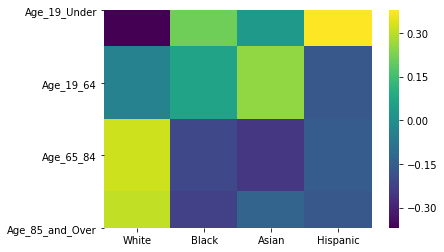

In [10]:
ax = sns.heatmap(Race_AgeCorr.transpose(),cmap="viridis" )

Text(0.5, 1.0, 'Poverty Percentages Across States (Averaged Over Counties)')

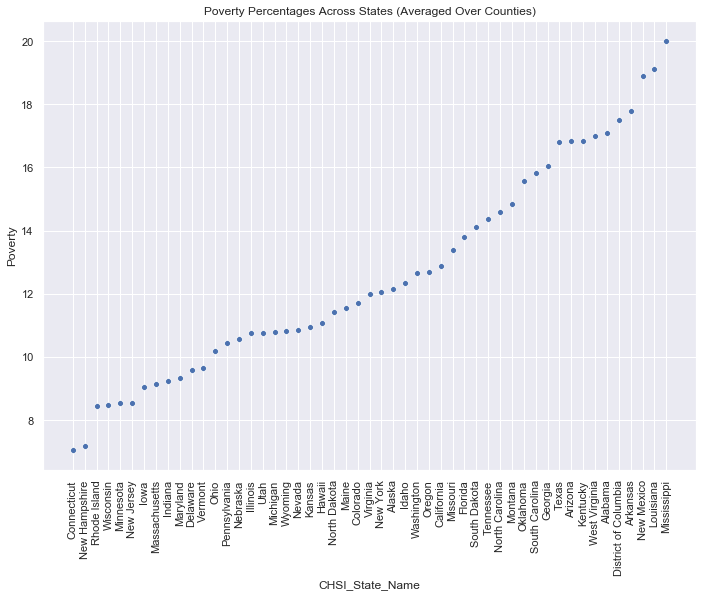

In [11]:
PovertyDf=df_Demog[['Poverty']].groupby(df_Demog['CHSI_State_Name']).mean().sort_values(by=['Poverty'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.scatterplot(x=PovertyDf.index, y="Poverty", data=PovertyDf)
plt.xticks(rotation=90)
plt.title('Poverty Percentages Across States (Averaged Over Counties)')

Text(0.5, 1.0, 'Youngsters/Young Populations Under 19 (Summed Over Counties)')

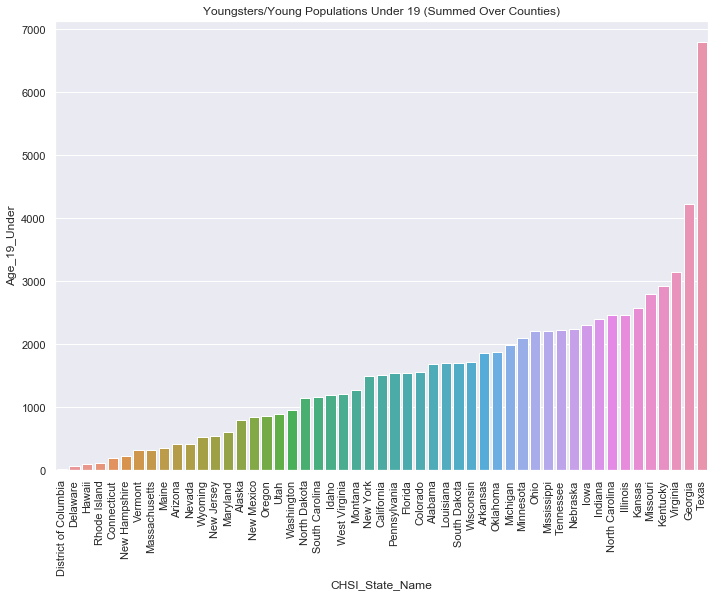

In [12]:
Age_19_Under_df=df_Demog[['Age_19_Under']].groupby(df_Demog['CHSI_State_Name']).sum().sort_values(by=['Age_19_Under'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=Age_19_Under_df.index, y="Age_19_Under", data=Age_19_Under_df)
plt.xticks(rotation=90)
plt.title('Youngsters/Young Populations Under 19 (Summed Over Counties)')

Text(0.5, 1.0, '19 to 64 Ages (Summed Over Counties)')

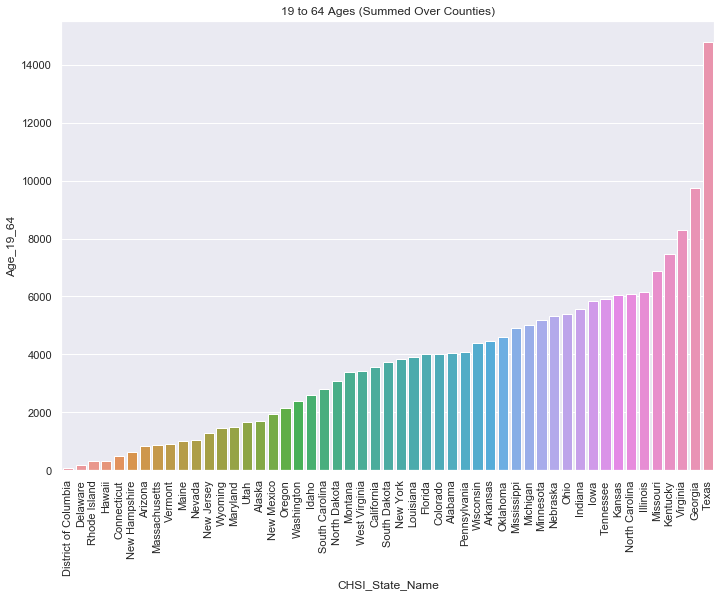

In [13]:
Age_19_64_df=df_Demog[['Age_19_64']].groupby(df_Demog['CHSI_State_Name']).sum().sort_values(by=['Age_19_64'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=Age_19_64_df.index, y="Age_19_64", data=Age_19_64_df)
plt.xticks(rotation=90)
plt.title('19 to 64 Ages (Summed Over Counties)')

Text(0.5, 1.0, '65 to 84 Ages (Summed Over Counties)')

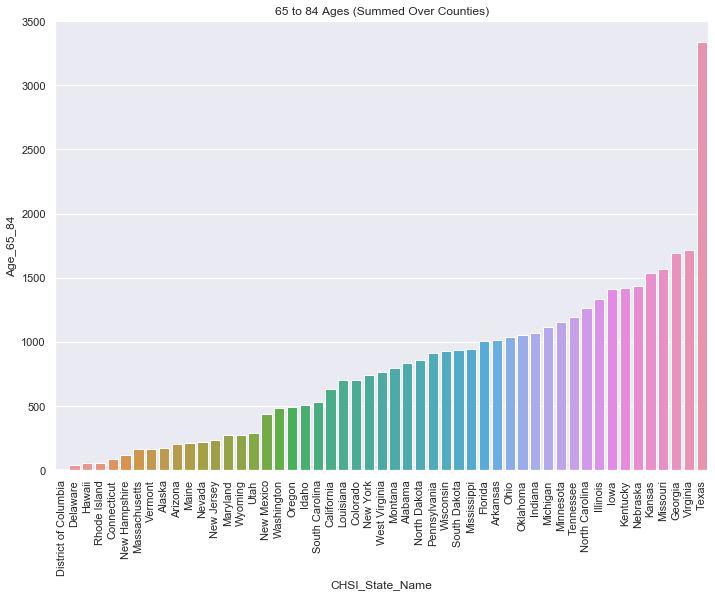

In [14]:
Age_65_84_df=df_Demog[['Age_65_84']].groupby(df_Demog['CHSI_State_Name']).sum().sort_values(by=['Age_65_84'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=Age_65_84_df.index, y="Age_65_84", data=Age_65_84_df)
plt.xticks(rotation=90)
plt.title('65 to 84 Ages (Summed Over Counties)')

Text(0.5, 1.0, 'Ages 85+ (Summed Over Counties)')

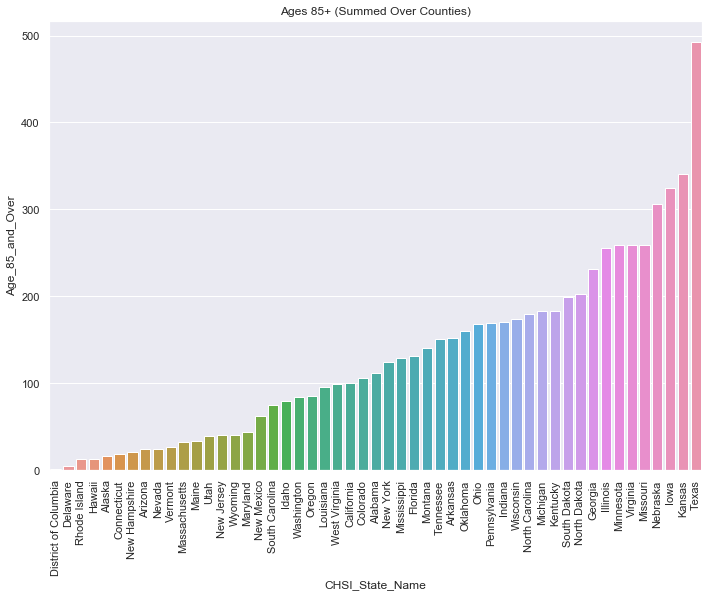

In [15]:
Age_85_and_Over_df=df_Demog[['Age_85_and_Over']].groupby(df_Demog['CHSI_State_Name']).sum().sort_values(by=['Age_85_and_Over'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.barplot(x=Age_85_and_Over_df.index, y="Age_85_and_Over", data=Age_85_and_Over_df)
plt.xticks(rotation=90)
plt.title('Ages 85+ (Summed Over Counties)')

Text(0.5, 1.0, 'Total Populations Across States (Summed Over Counties)')

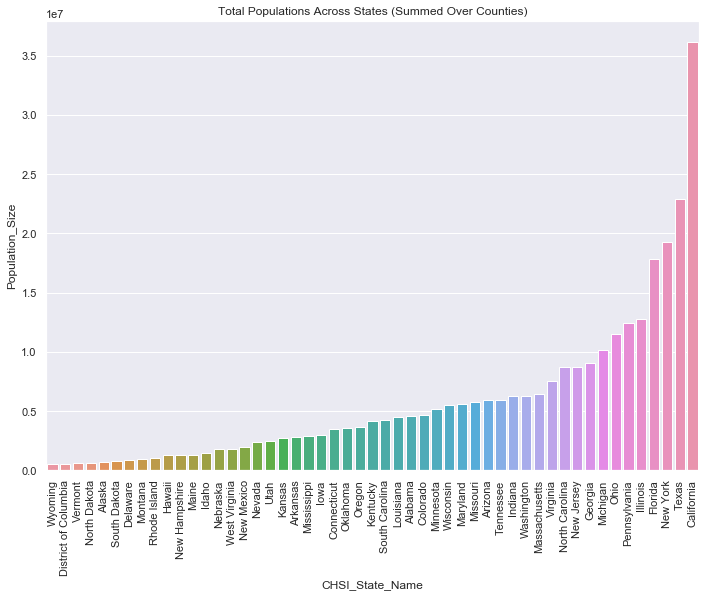

In [16]:
PopSize=df_Demog[['Population_Size']].groupby(df_Demog['CHSI_State_Name']).sum().sort_values(by=['Population_Size'])
chart = sns.barplot(x=PopSize.index, y="Population_Size", data=PopSize)
plt.xticks(rotation=90)
plt.title('Total Populations Across States (Summed Over Counties)')

## In the below two tables we see the distribution of the three majority races across different states (Top & Bottom 10 White dominant States)

In [17]:
Races_df_grp=df_Demog[['White','Black','Asian']].groupby(df_Demog['CHSI_State_Name']).mean().sort_values(by=['White','Black','Asian'])
print(Races_df_grp.head(10))
print("\n\n\n")
print(Races_df_grp.tail(10))

                          White      Black      Asian
CHSI_State_Name                                      
Hawaii                34.480000   0.940000  46.260000
District of Columbia  38.000000  57.000000   3.200000
Alaska                54.485185   1.174074   4.851852
Mississippi           58.269512  40.413415   0.437805
South Carolina        61.213043  37.119565   0.691304
Louisiana             66.328125  31.707813   0.740625
Alabama               69.795522  28.510448   0.455224
Georgia               70.218868  27.981761   0.928302
North Carolina        75.408000  21.386000   0.934000
Delaware              76.500000  19.533333   2.133333




                     White     Black     Asian
CHSI_State_Name                               
Kansas           95.712381  1.885714  0.694286
Indiana          95.984783  2.428261  0.677174
Wyoming          96.369565  0.460870  0.517391
Idaho            96.493182  0.406818  0.645455
West Virginia    96.907273  1.941818  0.389091
New Hampshire    96

# Vulnerable Populations & Environmental Health

In [18]:
df_VPEH=pd.read_csv('VUNERABLEPOPSANDENVHEALTH.csv')
Demo_VPEH_df=df_Demog.merge(df_VPEH, on=['State_FIPS_Code', 'County_FIPS_Code'], how='left', indicator=True)
Demo_VPEH_df=Demo_VPEH_df.replace([i for i in ListofNans], np.NAN)
imp_cols=['No_HS_Diploma', 'Unemployed', 'Sev_Work_Disabled', 'Major_Depression','Recent_Drug_Use']
Demo_VPEH_df[imp_cols[0]+str('%')]=Demo_VPEH_df[imp_cols[0]]/Demo_VPEH_df['Population_Size']
Demo_VPEH_df[imp_cols[1]+str('%')]=Demo_VPEH_df[imp_cols[1]]/Demo_VPEH_df['Population_Size']
Demo_VPEH_df[imp_cols[2]+str('%')]=Demo_VPEH_df[imp_cols[2]]/Demo_VPEH_df['Population_Size']
Demo_VPEH_df[imp_cols[3]+str('%')]=Demo_VPEH_df[imp_cols[3]]/Demo_VPEH_df['Population_Size']
Demo_VPEH_df[imp_cols[4]+str('%')]=Demo_VPEH_df[imp_cols[4]]/Demo_VPEH_df['Population_Size']
Demo_VPEH_df.head()

State_FIPS_Code  County_FIPS_Code CHSI_County_Name_x CHSI_State_Name_x  \
0                1                 1            Autauga           Alabama   
1                1                 3            Baldwin           Alabama   
2                1                 5            Barbour           Alabama   
3                1                 7               Bibb           Alabama   
4                1                 9             Blount           Alabama   

  CHSI_State_Abbr_x  Strata_ID_Number_x  Population_Size  Population_Density  \
0                AL                  29            48612                82.0   
1                AL                  16           162586               102.0   
2                AL                  51            28414                32.0   
3                AL                  42            21516                35.0   
4                AL                  28            55725                86.0   

   Poverty  Age_19_Under  ...  Ozone_Ind  Particulate_Matter_Ind  Lead_Ind  \
0     10.4          26.9  ...          1                       1         1   
1     10.2          23.5  ...          2                       1         1   
2     22.1          24.3  ...          1                       1         1   
3     16.8          24.6  ...          1                       1         1   
4     11.9          24.5  ...          1                       1         1   

   EH_Time_Span  _merge  No_HS_Diploma%  Unemployed%  Sev_Work_Disabled%  \
0     1999-2003    both        0.137620     0.015922            0.035526   
1     2001-2003    both        0.124574     0.015579            0.030341   
2     1999-2003    both        0.236820     0.020025            0.045822   
3     1994-2003    both        0.248885     0.016639            0.041829   
4     1999-2003    both        0.200646     0.014697            0.039785   

  Major_Depression% Recent_Drug_Use%  
0          0.055130         0.049247  
1          0.057533         0.047686  
2          0.056944         0.049377  
3          0.056609         0.048057  
4          0.056779         0.048004  

[5 rows x 50 columns]

Text(0.5, 1.0, 'No High School Diplomas Percentages Across States')

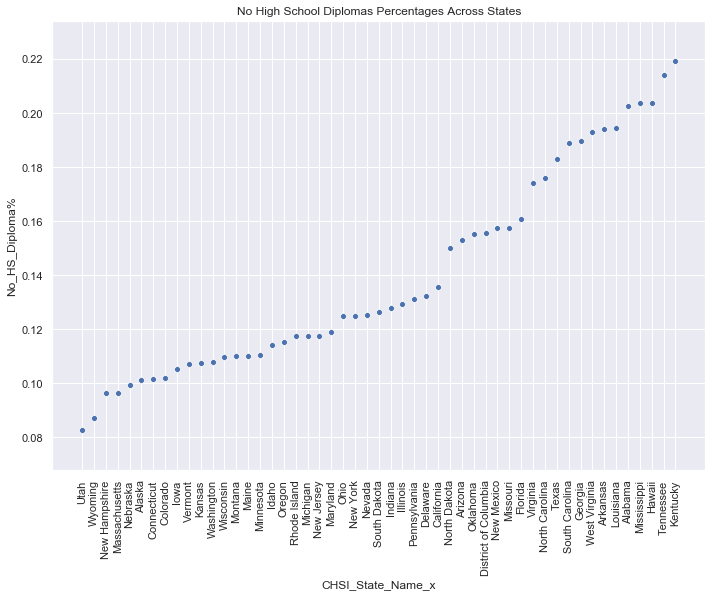

In [19]:
plot_cols=['No_HS_Diploma%', 'Unemployed%','Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%']
i=0
plot1=Demo_VPEH_df[plot_cols].groupby(Demo_VPEH_df['CHSI_State_Name_x']).mean().sort_values(by=plot_cols[i])
sns.set(rc={'figure.figsize':(11.7,8.27)})
name='chart'+ str(i)
name = sns.scatterplot(x=plot1.index, y=plot1[plot_cols[i]], data=plot1)
plt.xticks(rotation=90)
plt.title('No High School Diplomas Percentages Across States')

Text(0.5, 1.0, 'Unemployment % Across States')

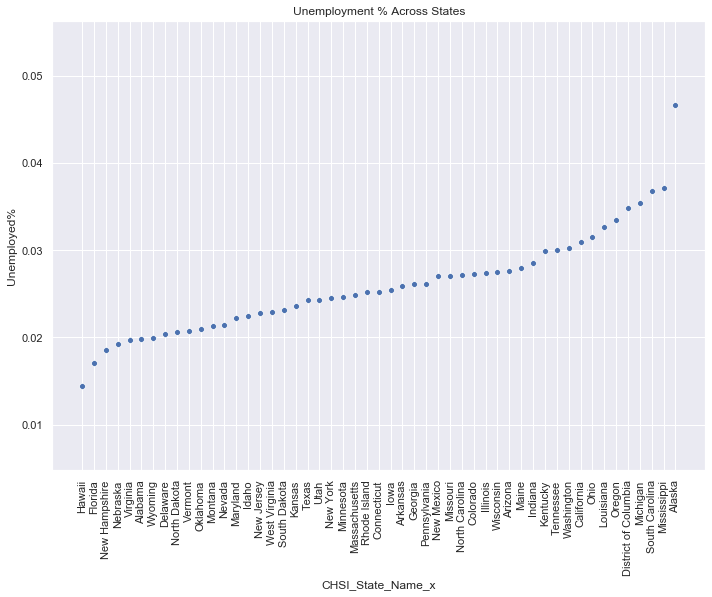

In [20]:
plot_cols=['No_HS_Diploma%', 'Unemployed%','Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%']
i=1
plot1=Demo_VPEH_df[plot_cols].groupby(Demo_VPEH_df['CHSI_State_Name_x']).mean().sort_values(by=plot_cols[i])
sns.set(rc={'figure.figsize':(11.7,8.27)})
name='chart'+ str(i)
name = sns.scatterplot(x=plot1.index, y=plot1[plot_cols[i]], data=plot1)
plt.xticks(rotation=90)
plt.title('Unemployment % Across States')

Text(0.5, 1.0, 'Severe Work Disability Percentages Across States')

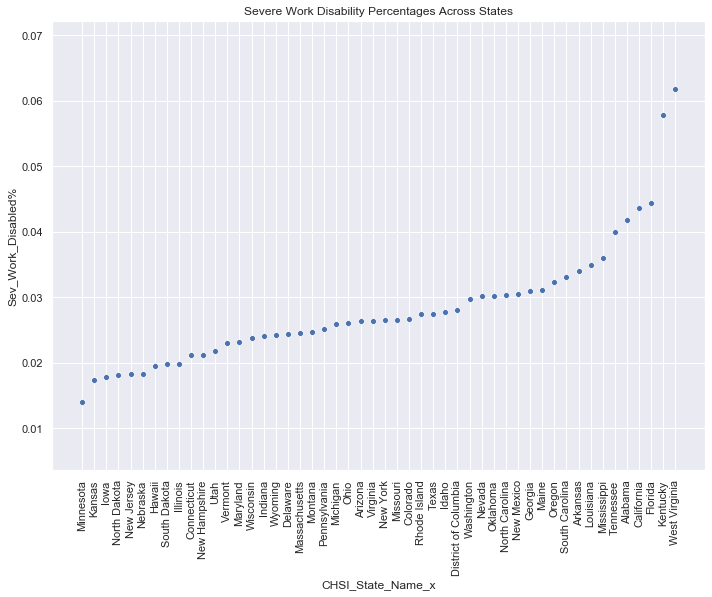

In [21]:
plot_cols=['No_HS_Diploma%', 'Unemployed%','Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%']
i=2
plot1=Demo_VPEH_df[plot_cols].groupby(Demo_VPEH_df['CHSI_State_Name_x']).mean().sort_values(by=plot_cols[i])
sns.set(rc={'figure.figsize':(11.7,8.27)})
name='chart'+ str(i)
name = sns.scatterplot(x=plot1.index, y=plot1[plot_cols[i]], data=plot1)
plt.xticks(rotation=90)
plt.title('Severe Work Disability Percentages Across States')

Text(0.5, 1.0, 'Major Depression Percentages Across States')

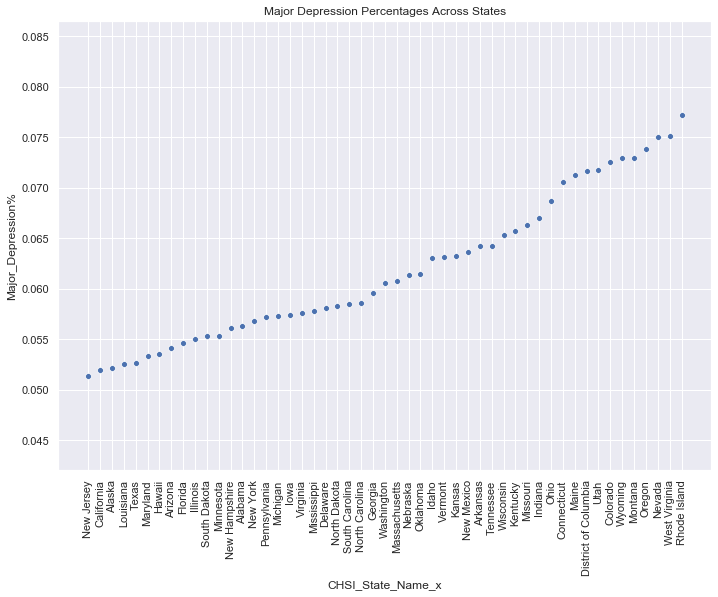

In [22]:
plot_cols=['No_HS_Diploma%', 'Unemployed%','Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%']
i=3
plot1=Demo_VPEH_df[plot_cols].groupby(Demo_VPEH_df['CHSI_State_Name_x']).mean().sort_values(by=plot_cols[i])
sns.set(rc={'figure.figsize':(11.7,8.27)})
name='chart'+ str(i)
name = sns.scatterplot(x=plot1.index, y=plot1[plot_cols[i]], data=plot1)
plt.xticks(rotation=90)
plt.title('Major Depression Percentages Across States')

Text(0.5, 1.0, 'Recent Drug Use (Within last one month)')

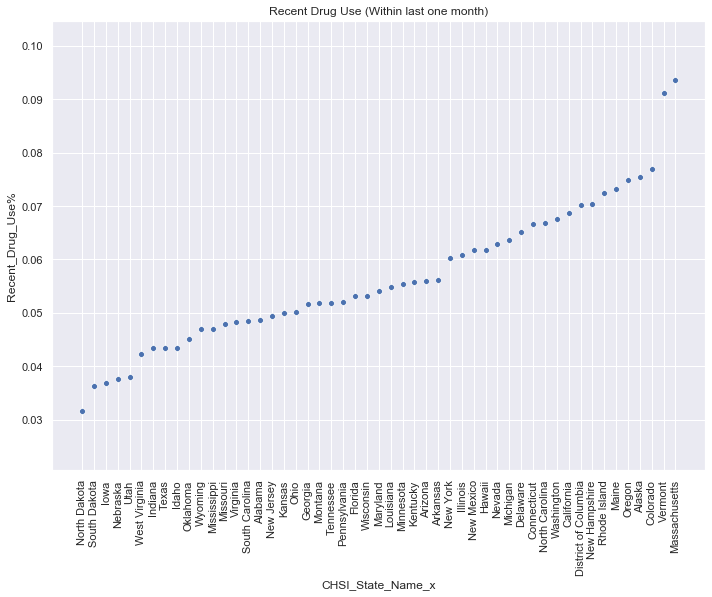

In [23]:
plot_cols=['No_HS_Diploma%', 'Unemployed%','Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%']
i=4
plot1=Demo_VPEH_df[plot_cols].groupby(Demo_VPEH_df['CHSI_State_Name_x']).mean().sort_values(by=plot_cols[i])
sns.set(rc={'figure.figsize':(11.7,8.27)})
name='chart'+ str(i)
name = sns.scatterplot(x=plot1.index, y=plot1[plot_cols[i]], data=plot1)
plt.xticks(rotation=90)
plt.title('Recent Drug Use (Within last one month)')

In [24]:
##some data transformations for better visualisations
Demo_VPEH_df['Poverty_log']=np.log(Demo_VPEH_df['Poverty'])
Demo_VPEH_df['Unemployed%_log']=np.log(Demo_VPEH_df['Unemployed%'])
Demo_VPEH_df['Major_Depression%_log']=np.log(Demo_VPEH_df['Major_Depression%'])
Demo_VPEH_df['Major_Depression_log']=np.log(Demo_VPEH_df['Major_Depression'])
Demo_VPEH_df['Population_Density_log']=np.log(Demo_VPEH_df['Population_Density'])
Demo_VPEH_df['Toxic_Chem_log']=np.log(Demo_VPEH_df['Toxic_Chem'])
Demo_VPEH_df['Population_Size_log']=np.log(Demo_VPEH_df['Population_Size'])
Demo_VPEH_df['Ecol_Rpt_log']=np.log(Demo_VPEH_df['Ecol_Rpt'])
Demo_VPEH_df['Ecol_Salm_Shig']=Demo_VPEH_df['Ecol_Rpt']+Demo_VPEH_df['Salm_Rpt']+Demo_VPEH_df['Shig_Rpt']

C:\ProgramData\Anaconda3\envs\cs418env\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Observations:
    1. There is a positive correlation of poverty and unemployment.
    2. Negative correlation of poverty and population density.
    3. No relationship between poverty and depression observed.
    4. Strong positive correlation between population density and depression.
    5. Positive correlation between poverty and No High School Diploma Percentages. 
    6. Population size and E.Colli, Salmonella and Shigella Correlated (Hygiene Related Diseases)
    7. Races Vs Poverty Trends

 There is a positive correlation of poverty and Unemployment (as expected) in most states


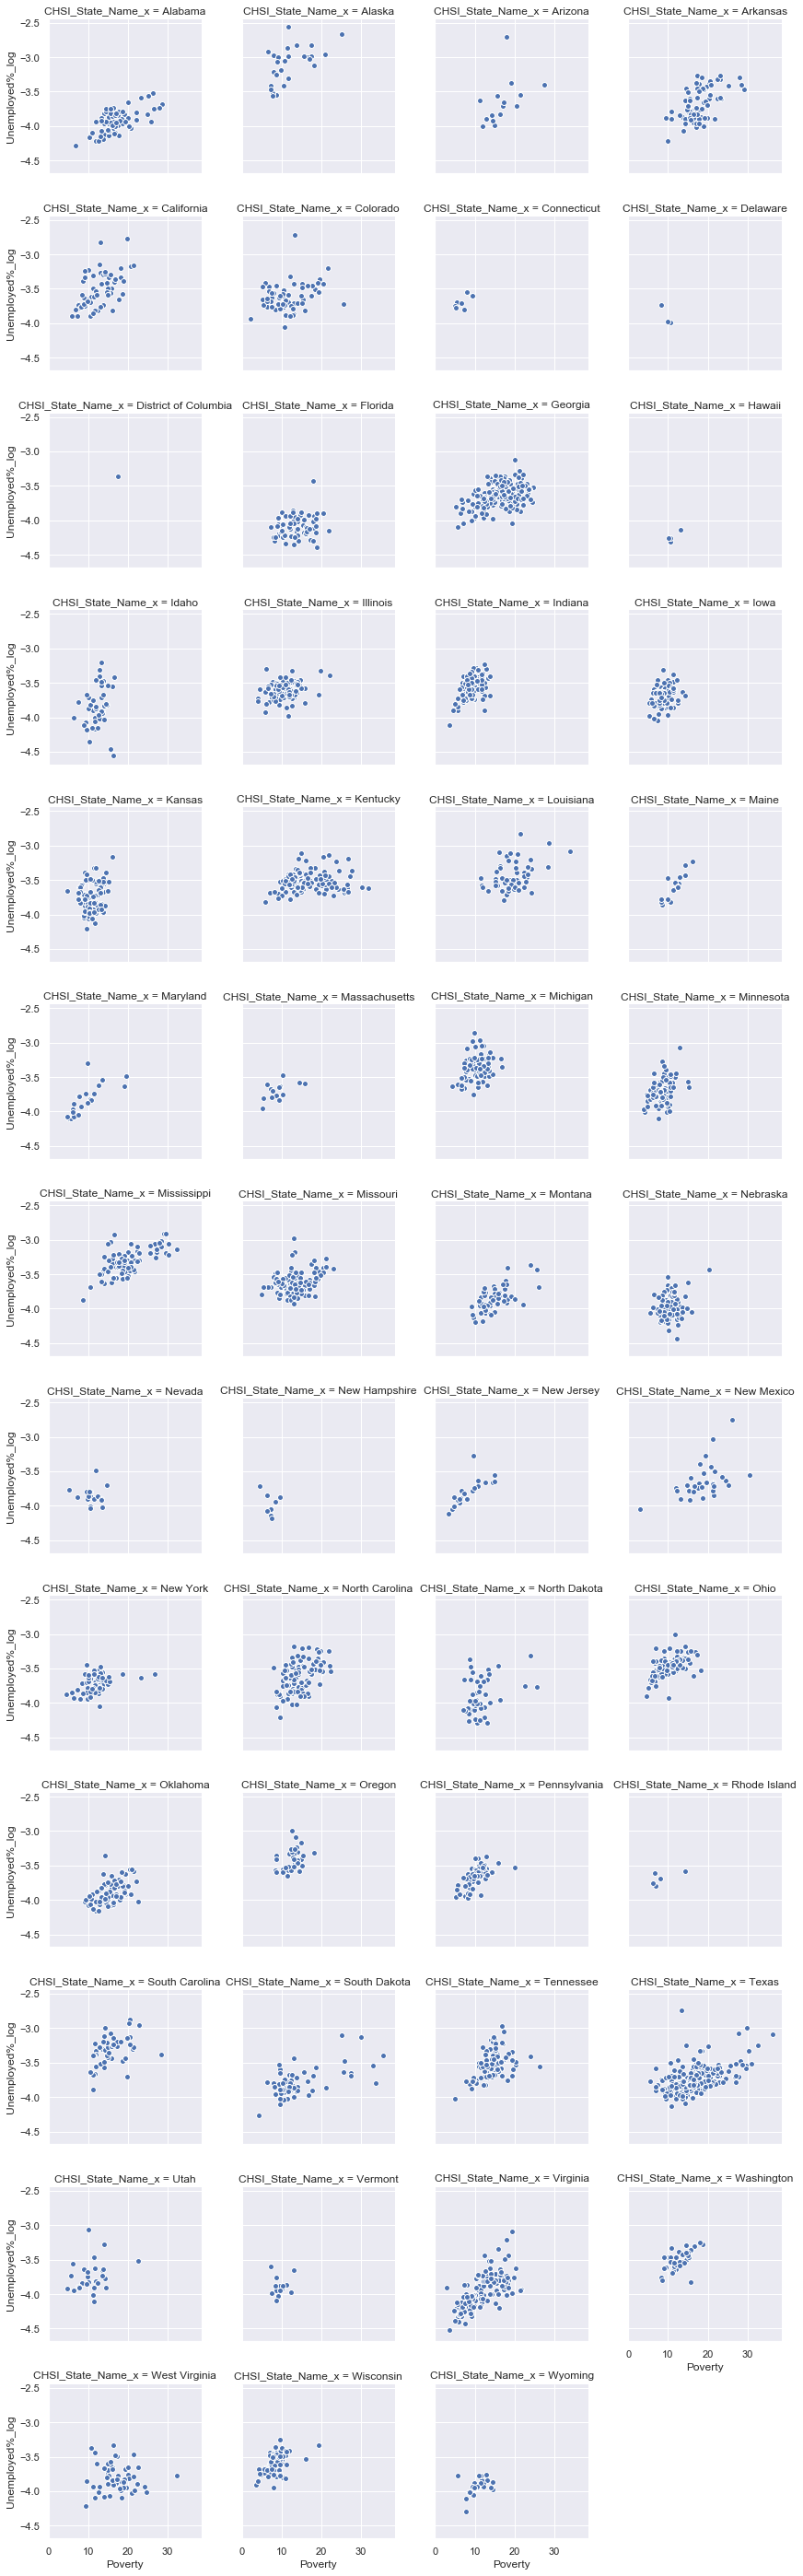

In [25]:
##Poverty & Unemployment
g =sns.FacetGrid(Demo_VPEH_df, col='CHSI_State_Name_x',col_wrap=4)
g =(g.map(plt.scatter, "Poverty", "Unemployed%_log", edgecolor="w").add_legend())
print(" There is a positive correlation of poverty and Unemployment (as expected) in most states")

There is a negative Correlation between Poverty and Population Density. 

 More dense areas seem to have less poverty -- maybe because more job opportunities?


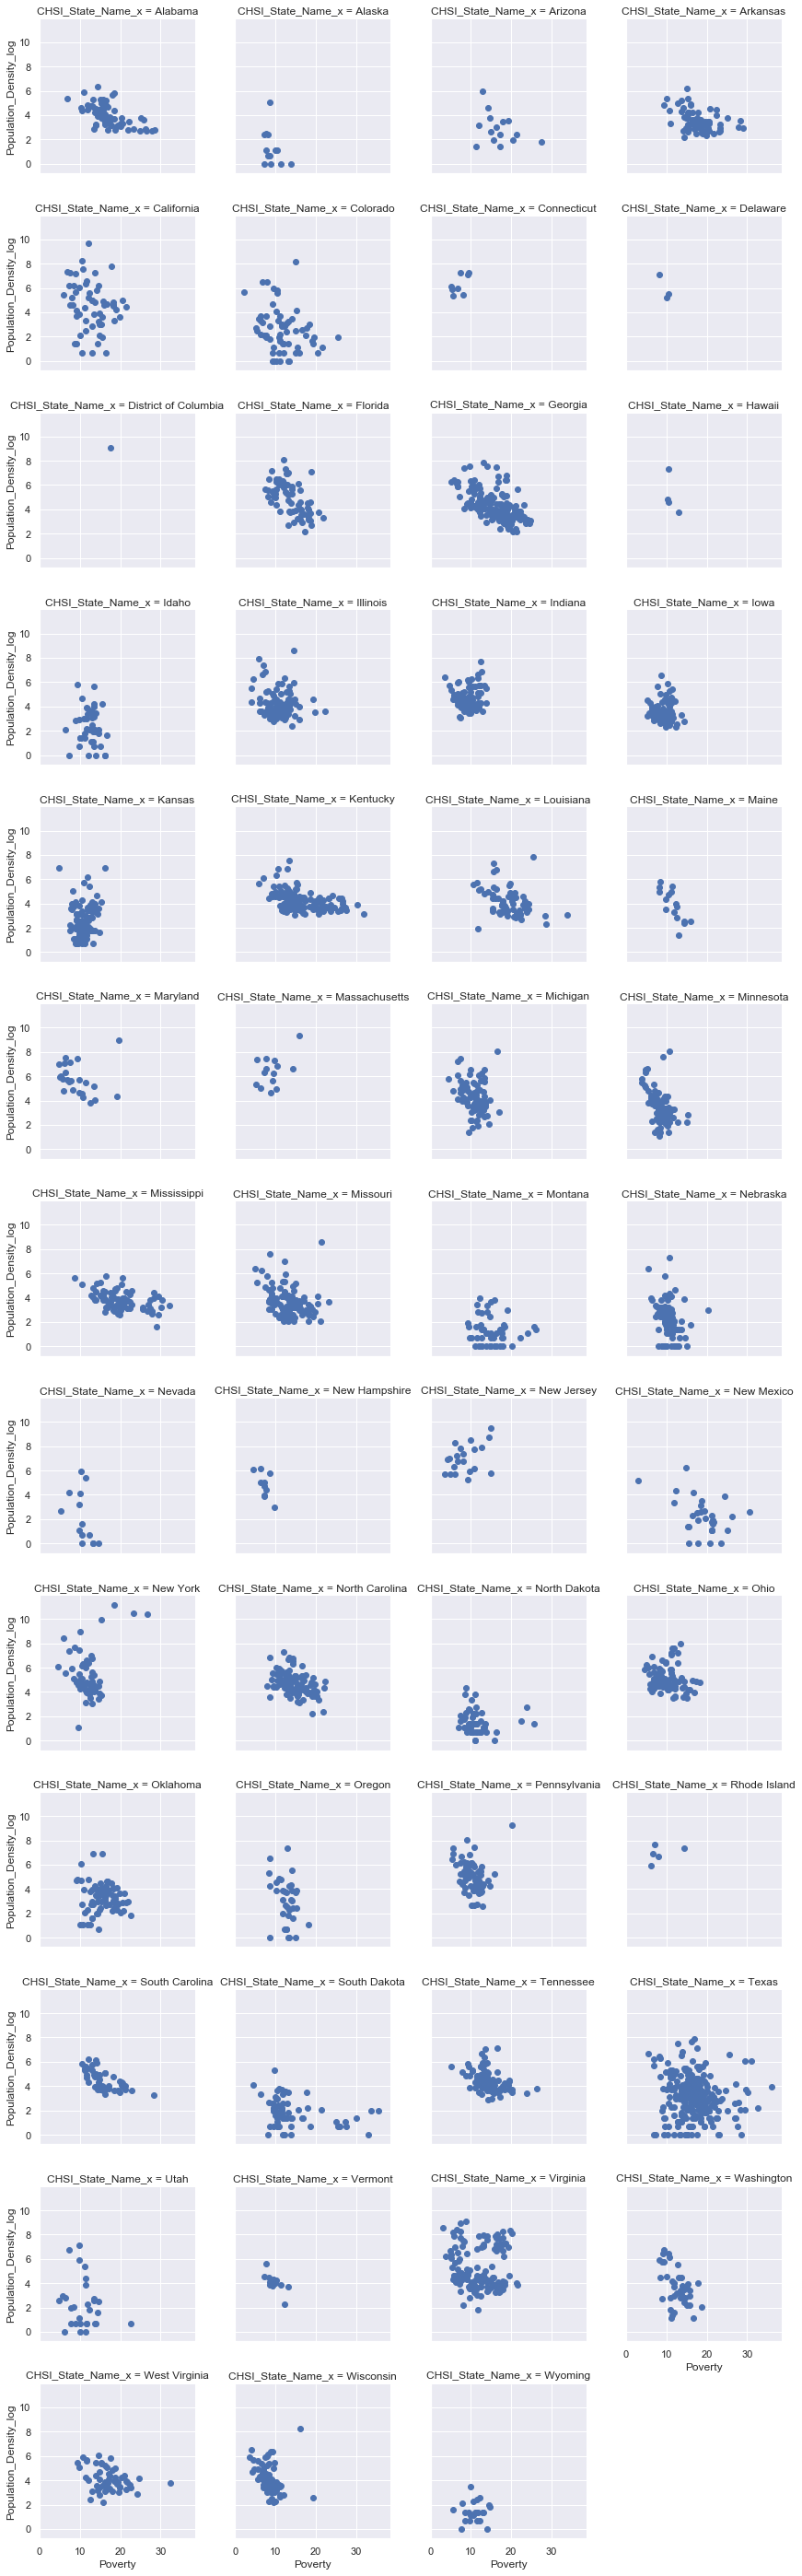

In [26]:
##Poverty & PopulationDensity
g =sns.FacetGrid(Demo_VPEH_df, col='CHSI_State_Name_x',col_wrap=4)
g =(g.map(plt.scatter, "Poverty", 'Population_Density_log').add_legend())
print("There is a negative Correlation between Poverty and Population Density. \n\n More dense areas seem to have less poverty -- maybe because more job opportunities?")

There's no relationship between poverty and depression


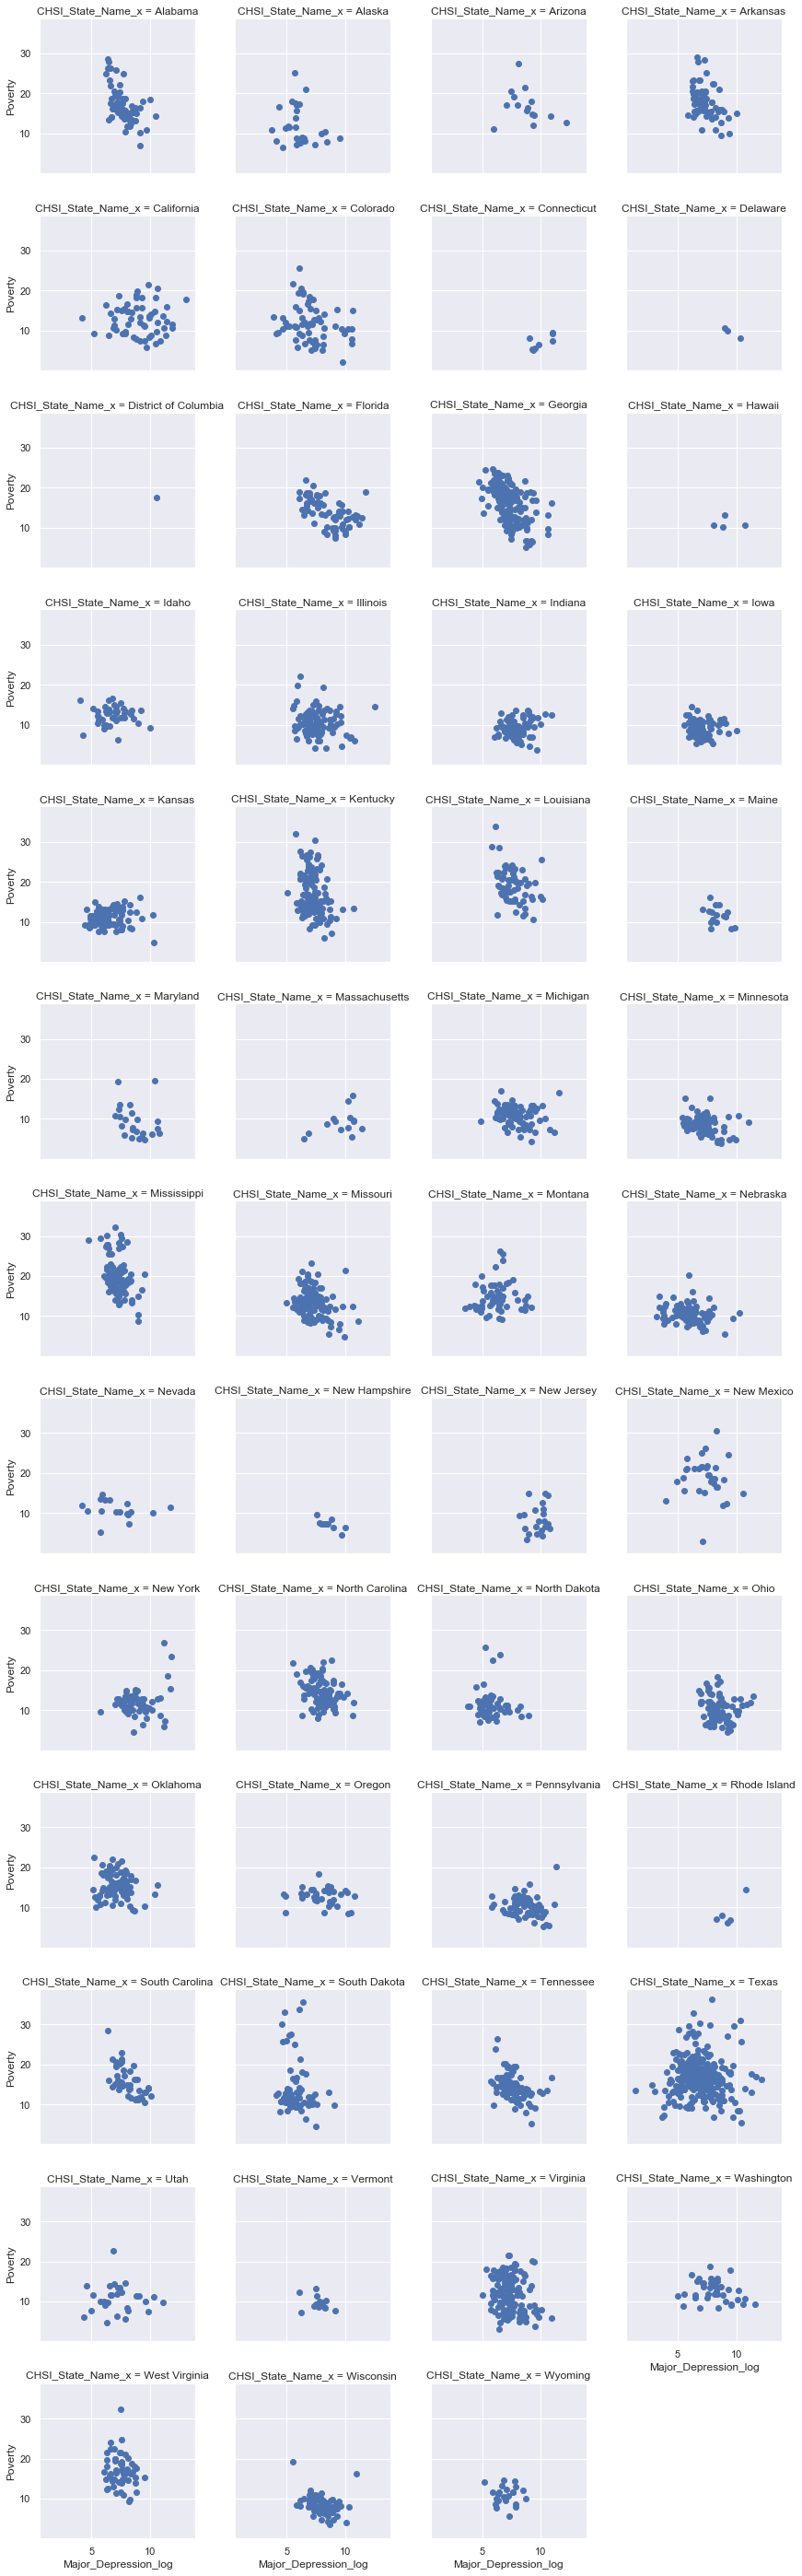

In [27]:
##Poverty & Major Depression
g =sns.FacetGrid(Demo_VPEH_df, col='CHSI_State_Name_x',col_wrap=4)
g =(g.map(plt.scatter, "Major_Depression_log", 'Poverty').add_legend())
print("There's no relationship between poverty and depression")

strong correlation of major depression and Population density


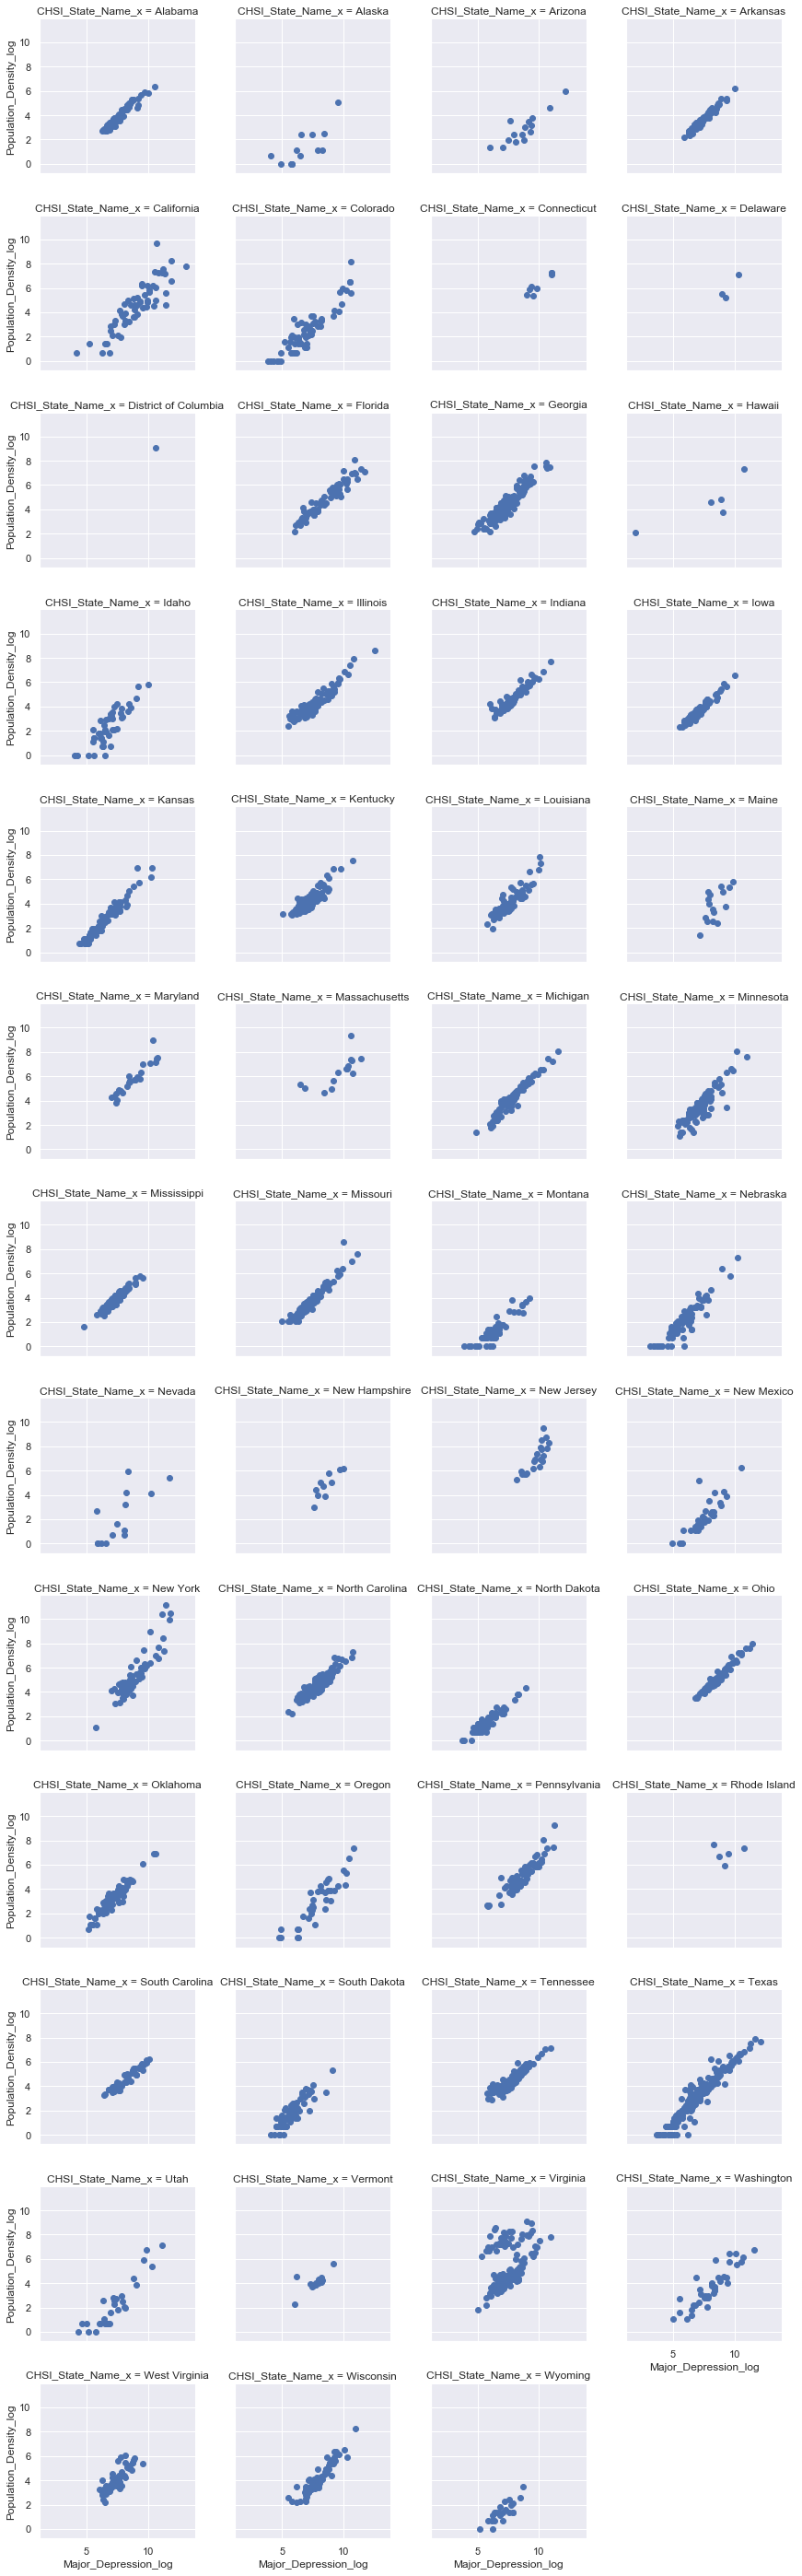

In [28]:
##Major Depression & Population Density
g =sns.FacetGrid(Demo_VPEH_df, col='CHSI_State_Name_x',col_wrap=4)
g =(g.map(plt.scatter, 'Major_Depression_log', 'Population_Density_log').add_legend())
print("strong correlation of major depression and Population density")

Positive correlation between poverty and no hs diploma


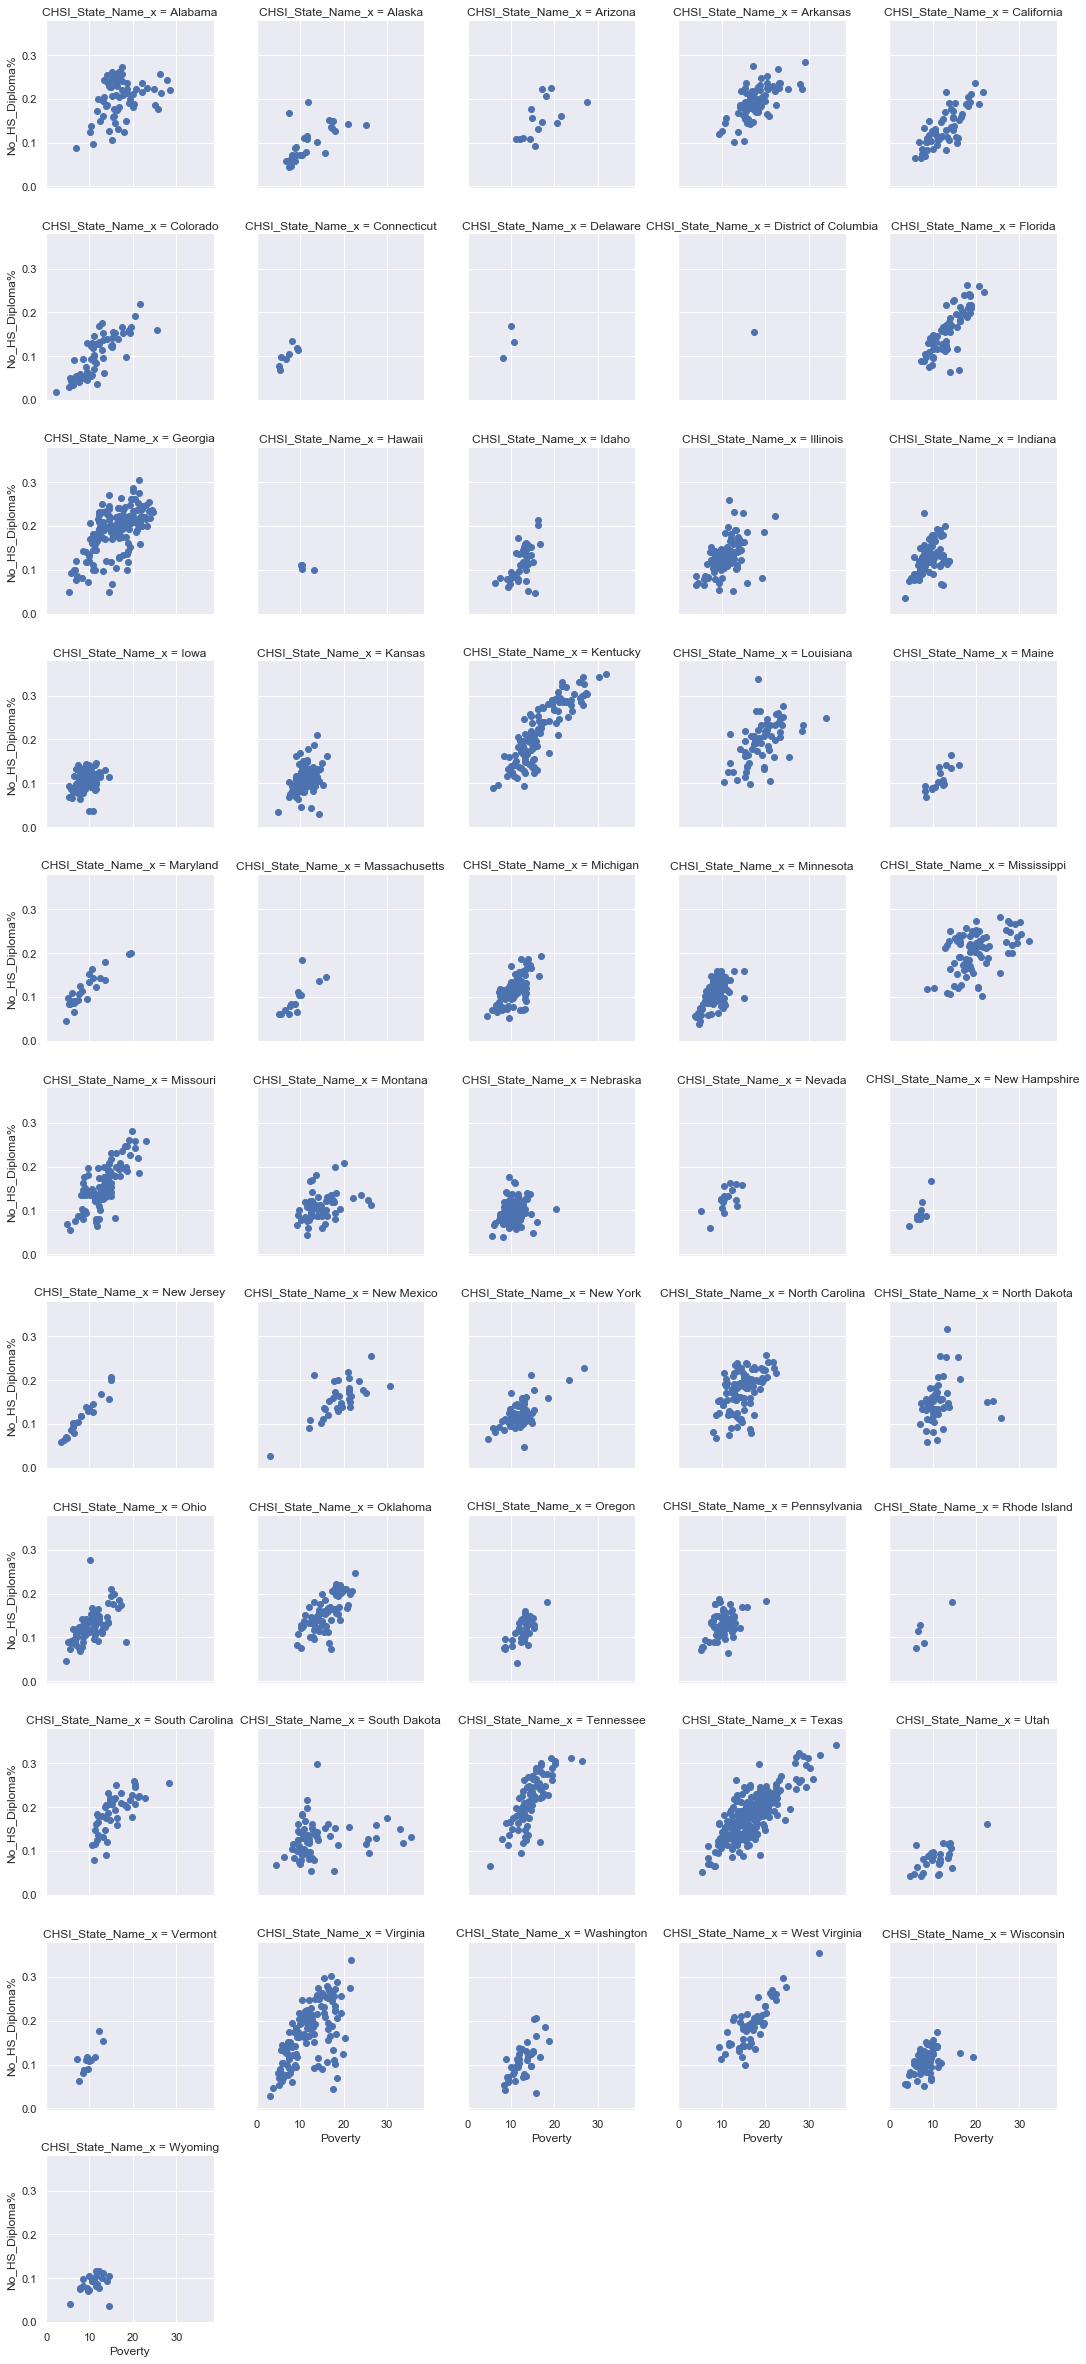

In [29]:
###Poverty & No High School Diploma Numbers
g =sns.FacetGrid(Demo_VPEH_df, col='CHSI_State_Name_x',col_wrap=5)
g =(g.map(plt.scatter, 'Poverty', 'No_HS_Diploma%').add_legend())
print("Positive correlation between poverty and no hs diploma")

In [30]:
ToCorr=Demo_VPEH_df[['Population_Size', 'Population_Density', 'Poverty', 'Age_19_Under',
       'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black',
       'Native_American', 'Asian', 'Hispanic','No_HS_Diploma%', 'Unemployed%',
       'Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%',
       'Ecol_Rpt', 'Ecol_Rpt_Ind', 'Ecol_Exp', 'Salm_Rpt',
       'Salm_Rpt_Ind', 'Salm_Exp', 'Shig_Rpt', 'Shig_Rpt_Ind', 'Shig_Exp',
       'Toxic_Chem']]

CorrelationTable=ToCorr.corr()
CorrelationTable=CorrelationTable[(CorrelationTable>0.5) | (CorrelationTable<-0.5)]
CorrelationTable=CorrelationTable.reset_index()
CorrelationTable=pd.melt(CorrelationTable, id_vars=['index'])
CorrelationTable=CorrelationTable.dropna()
CorrelationTable=CorrelationTable[CorrelationTable['value']!=1]
print("Correlated Attributes, Print more to see")
CorrelationTable[:5]

Correlated Attributes, Print more to see


index         variable     value
19  Ecol_Exp  Population_Size  0.955662
20  Salm_Rpt  Population_Size  0.660316
22  Salm_Exp  Population_Size  0.976794
23  Shig_Rpt  Population_Size  0.506793
25  Shig_Exp  Population_Size  0.897634

C:\ProgramData\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'No High School Diploma Percentages & Poverty')

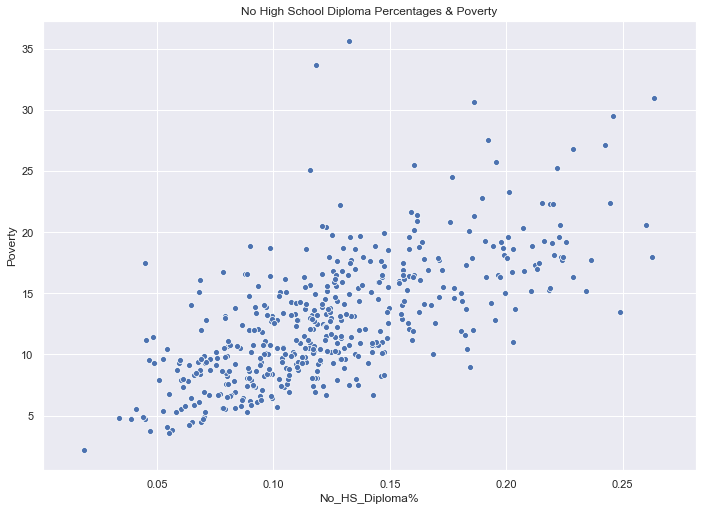

In [31]:
Demo_VPEH_dfTemp=Demo_VPEH_df[Demo_VPEH_df['Ecol_Salm_Shig']>100]
Demo_VPEH_dfTemp['Ecol_Salm_Shig']=np.log(Demo_VPEH_dfTemp['Ecol_Salm_Shig'])
Plot1=sns.scatterplot(x='No_HS_Diploma%', y='Poverty', data=Demo_VPEH_dfTemp)
plt.title('No High School Diploma Percentages & Poverty')

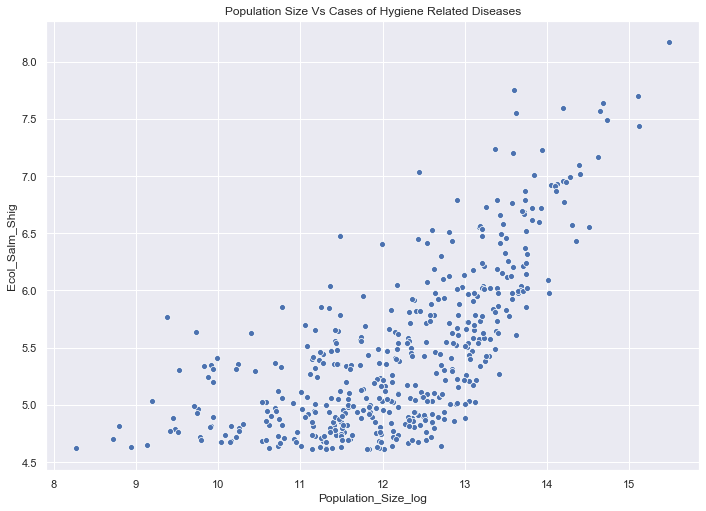

In [32]:
Plot2=sns.scatterplot(x='Population_Size_log', y='Ecol_Salm_Shig', data=Demo_VPEH_dfTemp)
plt.title('Population Size Vs Cases of Hygiene Related Diseases')
plt.rcParams["figure.figsize"] = (5,5)

C:\ProgramData\Anaconda3\envs\cs418env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Poverty & Race')

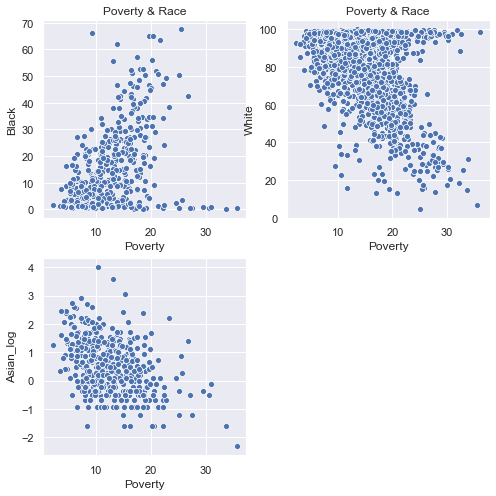

In [33]:
plt.rcParams["figure.figsize"] = (8,8)
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1=sns.scatterplot(x='Poverty', y='Black', data=Demo_VPEH_dfTemp)
plt.title('Poverty & Race')

ax2 = fig.add_subplot(gs[1, 0])
Demo_VPEH_dfTemp['Asian_log']=np.log(Demo_VPEH_dfTemp['Asian'])
ax2=sns.scatterplot(x='Poverty', y='Asian_log', data=Demo_VPEH_dfTemp)
#plt.title('Poverty & Race: Asian')

ax3 = fig.add_subplot(gs[0, 1])
ax3=sns.scatterplot(x='Poverty', y='White', data=Demo_VPEH_df)
plt.title('Poverty & Race')

# Preventive Services Use

In [34]:
Demo_VPEH_df_tojoin=Demo_VPEH_df[['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name_x',
       'CHSI_State_Name_x', 'CHSI_State_Abbr_x', 'Strata_ID_Number_x',
       'Population_Size', 'Population_Density', 'Poverty', 'Age_19_Under',
       'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black',
       'Native_American', 'Asian', 'Hispanic','No_HS_Diploma', 'Unemployed', 
       'Sev_Work_Disabled', 'Major_Depression',
       'Recent_Drug_Use', 'Ecol_Rpt',  'Salm_Rpt', 'Shig_Rpt','Toxic_Chem', 'No_HS_Diploma%', 'Unemployed%',
       'Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%',
       'Poverty_log']]
df_PSU=pd.read_csv('PREVENTIVESERVICESUSE.csv')
Useful=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'FluB_Rpt', 'HepA_Rpt','HepB_Rpt','Meas_Rpt',  'Pert_Rpt','CRS_Rpt', 'Syphilis_Rpt',
       'Pap_Smear','Mammogram', 'Proctoscopy',  'Pneumo_Vax', 'Flu_Vac']
df_PSU=df_PSU[Useful]
HandleNanCols=['FluB_Rpt',
       'HepA_Rpt', 'HepB_Rpt', 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt',
       'Syphilis_Rpt', 'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax',
       'Flu_Vac']
df_PSU[df_PSU[HandleNanCols]<0]=np.nan
PSU_Demo_VPEH_df=df_PSU.merge(Demo_VPEH_df_tojoin, on=['State_FIPS_Code', 'County_FIPS_Code'], how='left', indicator=True)
PSU_Demo_VPEH_df

State_FIPS_Code  County_FIPS_Code                 CHSI_County_Name  \
0                   1                 1                          Autauga   
1                   1                 3                          Baldwin   
2                   1                 5                          Barbour   
3                   1                 7                             Bibb   
4                   1                 9                           Blount   
5                   1                11                          Bullock   
6                   1                13                           Butler   
7                   1                15                          Calhoun   
8                   1                17                         Chambers   
9                   1                19                         Cherokee   
10                  1                21                          Chilton   
11                  1                23                          Choctaw   
12                  1                25                           Clarke   
13                  1                27                             Clay   
14                  1                29                         Cleburne   
15                  1                31                           Coffee   
16                  1                33                          Colbert   
17                  1                35                          Conecuh   
18                  1                37                            Coosa   
19                  1                39                        Covington   
20                  1                41                         Crenshaw   
21                  1                43                          Cullman   
22                  1                45                             Dale   
23                  1                47                           Dallas   
24                  1                49                           DeKalb   
25                  1                51                           Elmore   
26                  1                53                         Escambia   
27                  1                55                           Etowah   
28                  1                57                          Fayette   
29                  1                59                         Franklin   
30                  1                61                           Geneva   
31                  1                63                           Greene   
32                  1                65                             Hale   
33                  1                67                            Henry   
34                  1                69                          Houston   
35                  1                71                          Jackson   
36                  1                73                        Jefferson   
37                  1                75                            Lamar   
38                  1                77                       Lauderdale   
39                  1                79                         Lawrence   
40                  1                81                              Lee   
41                  1                83                        Limestone   
42                  1                85                          Lowndes   
43                  1                87                            Macon   
44                  1                89                          Madison   
45                  1                91                          Marengo   
46                  1                93                           Marion   
47                  1                95                         Marshall   
48                  1                97                           Mobile   
49                  1                99                           Monroe   
50                  1               101                       Montgomery   
51                  1               103               

In [35]:
for i in range(0,len(HandleNanCols)):
    stringname=HandleNanCols[i]
    stringnameo=stringname+'%'
    PSU_Demo_VPEH_df[stringnameo]=PSU_Demo_VPEH_df[stringname]/PSU_Demo_VPEH_df['Population_Size']

def CorrelationTable(ToCorr):
    CorrelationTable=ToCorr.corr()
    CorrelationTable=CorrelationTable[(CorrelationTable>0.5) | (CorrelationTable<-0.5)]
    CorrelationTable=CorrelationTable.reset_index()
    CorrelationTable=pd.melt(CorrelationTable, id_vars=['index'])
    CorrelationTable=CorrelationTable.dropna()
    CorrelationTable=CorrelationTable[CorrelationTable['value']!=1]
    return(CorrelationTable)

Table=CorrelationTable(PSU_Demo_VPEH_df)
Table

index            variable     value
122          Proctoscopy    Strata_ID_Number -0.506233
160           Pap_Smear%    Strata_ID_Number  0.661957
161           Mammogram%    Strata_ID_Number  0.657951
162         Proctoscopy%    Strata_ID_Number  0.728391
163          Pneumo_Vax%    Strata_ID_Number  0.699381
164             Flu_Vac%    Strata_ID_Number  0.686189
169             HepA_Rpt            FluB_Rpt  0.608311
170             HepB_Rpt            FluB_Rpt  0.567881
174         Syphilis_Rpt            FluB_Rpt  0.569672
181      Population_Size            FluB_Rpt  0.674565
193        No_HS_Diploma            FluB_Rpt  0.592917
194           Unemployed            FluB_Rpt  0.662125
196     Major_Depression            FluB_Rpt  0.697320
197      Recent_Drug_Use            FluB_Rpt  0.648868
199             Salm_Rpt            FluB_Rpt  0.710394
200             Shig_Rpt            FluB_Rpt  0.565460
223             FluB_Rpt            HepA_Rpt  0.608311
225             HepB_Rpt            HepA_Rpt  0.681509
229         Syphilis_Rpt            HepA_Rpt  0.752447
236      Population_Size            HepA_Rpt  0.859079
248        No_HS_Diploma            HepA_Rpt  0.874793
249           Unemployed            HepA_Rpt  0.844660
251     Major_Depression            HepA_Rpt  0.845851
252      Recent_Drug_Use            HepA_Rpt  0.861442
254             Salm_Rpt            HepA_Rpt  0.529761
278             FluB_Rpt            HepB_Rpt  0.567881
279             HepA_Rpt            HepB_Rpt  0.681509
284         Syphilis_Rpt            HepB_Rpt  0.767980
291      Population_Size            HepB_Rpt  0.724118
292   Population_Density            HepB_Rpt  0.524712
303        No_HS_Diploma            HepB_Rpt  0.688123
304           Unemployed            HepB_Rpt  0.740855
306     Major_Depression            HepB_Rpt  0.730483
307      Recent_Drug_Use            HepB_Rpt  0.669630
309             Salm_Rpt            HepB_Rpt  0.688945
310             Shig_Rpt            HepB_Rpt  0.554473
376            Meas_Rpt%            Meas_Rpt  0.594144
401      Population_Size            Pert_Rpt  0.547812
414           Unemployed            Pert_Rpt  0.528746
416     Major_Depression            Pert_Rpt  0.562712
417      Recent_Drug_Use            Pert_Rpt  0.567234
488             CRS_Rpt%             CRS_Rpt  0.574034
498             FluB_Rpt        Syphilis_Rpt  0.569672
499             HepA_Rpt        Syphilis_Rpt  0.752447
500             HepB_Rpt        Syphilis_Rpt  0.767980
511      Population_Size        Syphilis_Rpt  0.731722
523        No_HS_Diploma        Syphilis_Rpt  0.745466
524           Unemployed        Syphilis_Rpt  0.767328
526     Major_Depression        Syphilis_Rpt  0.724688
527      Recent_Drug_Use        Syphilis_Rpt  0.708896
529             Salm_Rpt        Syphilis_Rpt  0.554995
561            Mammogram           Pap_Smear  0.609347
562          Proctoscopy           Pap_Smear  0.510066
615            Pap_Smear           Mammogram  0.609347
617          Proctoscopy           Mammogram  0.614126
662     Strata_ID_Number         Proctoscopy -0.506233
670            Pap_Smear         Proctoscopy  0.510066
671            Mammogram         Proctoscopy  0.614126
675   Strata_ID_Number_x         Proctoscopy -0.506233
729              Flu_Vac          Pneumo_Vax  0.648188
783           Pneumo_Vax             Flu_Vac  0.648188
837          Proctoscopy  Strata_ID_Number_x -0.506233
875           Pap_Smear%  Strata_ID_Number_x  0.661957
876           Mammogram%  Strata_ID_Number_x  0.657951
877         Proctoscopy%  Strata_ID_Number_x  0.728391
878          Pneumo_Vax%  Strata_ID_Number_x  0.699381
879             Flu_Vac%  Strata_ID_Number_x  0.686189
883             FluB_Rpt     Population_Size  0.674565
884             HepA_Rpt     Population_Size  0.859079
885             HepB_Rpt     Population_Size  0.724118
887             Pert_Rpt     Population_Size  0.547812
889         Syphilis_Rpt     Population_Size  0.731722
908 

### By this table we find the most correlated columns and study those

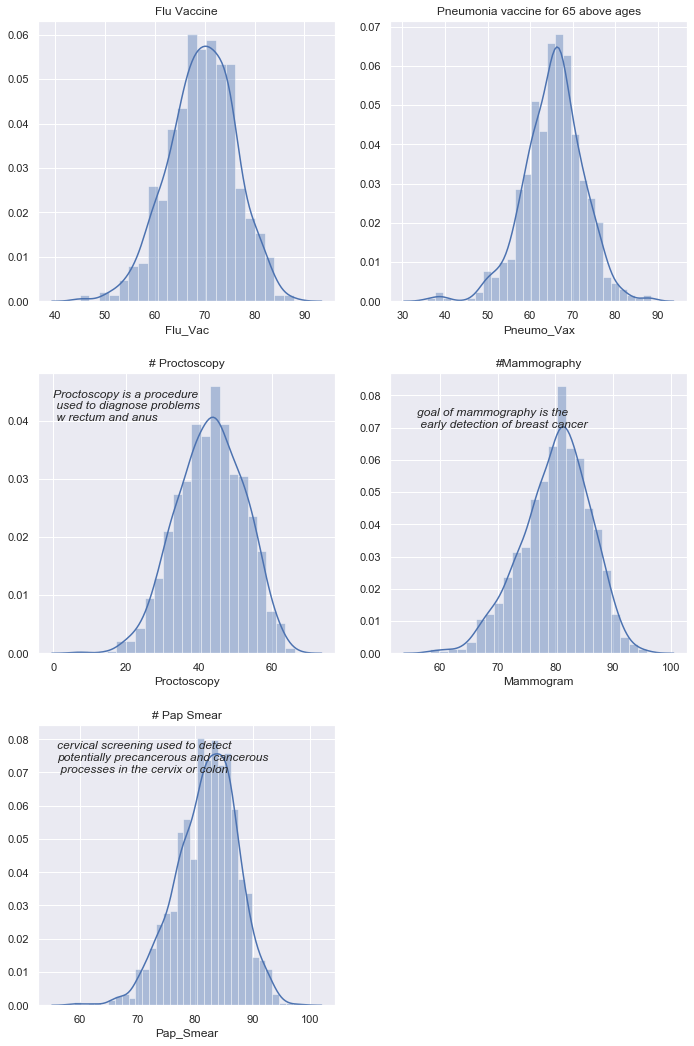

In [36]:
Histogramsdf=PSU_Demo_VPEH_df.copy()
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax1=sns.distplot((Histogramsdf['Flu_Vac'].dropna()))
ax1.set_title("Flu Vaccine")

ax2 = plt.subplot2grid((3, 3), (0, 1))
ax2=sns.distplot((Histogramsdf['Pneumo_Vax'].dropna()))
ax2.set_title("Pneumonia vaccine for 65 above ages")

ax3 = plt.subplot2grid((3, 3), (1, 0))
ax3=sns.distplot((Histogramsdf['Proctoscopy'].dropna()))
ax3.set_title("# Proctoscopy")
ax3.text(0, 0.04, 'Proctoscopy is a procedure \n used to diagnose problems\n w rectum and anus', style='italic')

ax4 = plt.subplot2grid((3, 3), (1, 1))
ax4=sns.distplot((Histogramsdf['Mammogram'].dropna()))
ax4.set_title("#Mammography")
ax4.text(56, 0.07, 'goal of mammography is the \n early detection of breast cancer', style='italic')

ax5 = plt.subplot2grid((3, 3), (2, 0))
ax5=sns.distplot((Histogramsdf['Pap_Smear'].dropna()))
ax5.set_title("# Pap Smear")
ax5.text(56, 0.07, 'cervical screening used to detect \npotentially precancerous and cancerous \n processes in the cervix or colon', style='italic')
plt.tight_layout(pad=2, w_pad=2, h_pad=2.0)

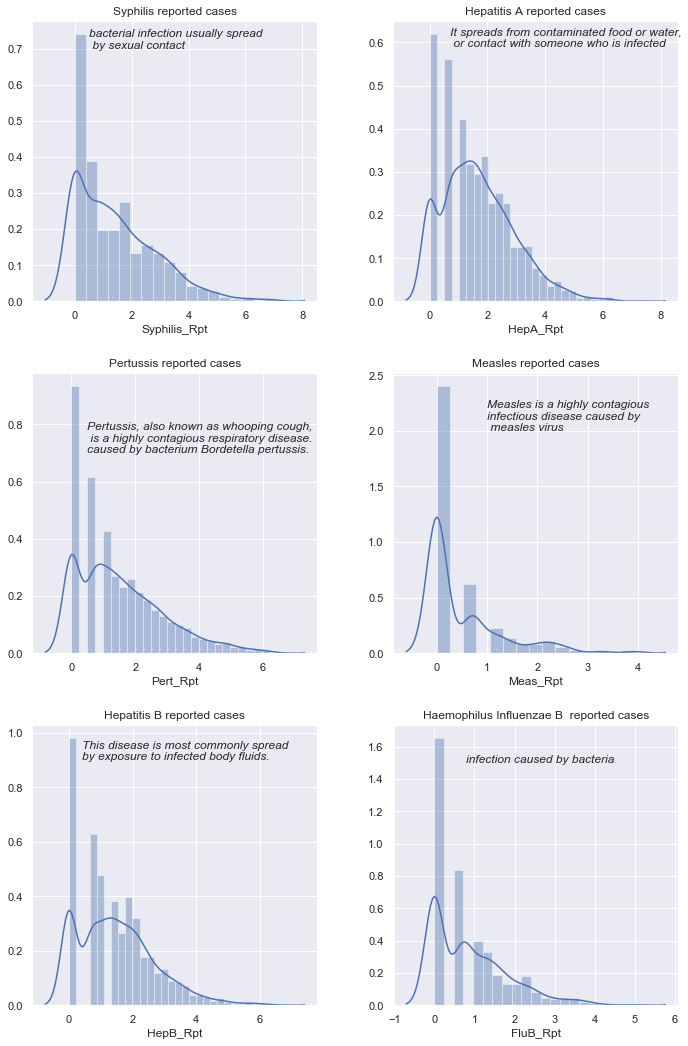

In [37]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

ax6 = plt.subplot2grid((3, 3), (0, 0))
ax6=sns.distplot(np.log(Histogramsdf[Histogramsdf['Syphilis_Rpt']>0]['Syphilis_Rpt']))
ax6.set_title("Syphilis reported cases")
ax6.text(0.5, 0.7, 'bacterial infection usually spread\n by sexual contact', style='italic')

ax7 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax7=sns.distplot(np.log(Histogramsdf[Histogramsdf['HepA_Rpt']>0]['HepA_Rpt']))
ax7.set_title("Hepatitis A reported cases")
ax7.text(0.7, 0.59, 'It spreads from contaminated food or water,\n or contact with someone who is infected', style='italic')

ax8 = plt.subplot2grid((3, 3), (1, 0), colspan=1)
ax8=sns.distplot(np.log(Histogramsdf[Histogramsdf['Pert_Rpt']>0]['Pert_Rpt']))
ax8.set_title("Pertussis reported cases")
ax8.text(0.5, 0.7, 'Pertussis, also known as whooping cough,\n is a highly contagious respiratory disease.\ncaused by bacterium Bordetella pertussis.', style='italic')

ax9 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax9=sns.distplot(np.log(Histogramsdf[Histogramsdf['Meas_Rpt']>0]['Meas_Rpt']))
ax9.set_title("Measles reported cases")
ax9.text(1, 2, 'Measles is a highly contagious \ninfectious disease caused by \n measles virus', style='italic')

ax10 = plt.subplot2grid((3, 3), (2, 0), colspan=1)
ax10=sns.distplot(np.log(Histogramsdf[Histogramsdf['HepB_Rpt']>0]['HepB_Rpt']))
ax10.set_title("Hepatitis B reported cases")
ax10.text(0.4, 0.9, 'This disease is most commonly spread \nby exposure to infected body fluids.', style='italic')


ax11 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax11=sns.distplot(np.log(Histogramsdf[Histogramsdf['FluB_Rpt']>0]['FluB_Rpt']))
ax11.set_title("Haemophilus Influenzae B  reported cases")
ax11.text(0.8, 1.5, 'infection caused by bacteria', style='italic')

plt.tight_layout(pad=2, w_pad=2, h_pad=2.0)

Strong Correlation of Depression & Drug Usage Causation or Correlation?


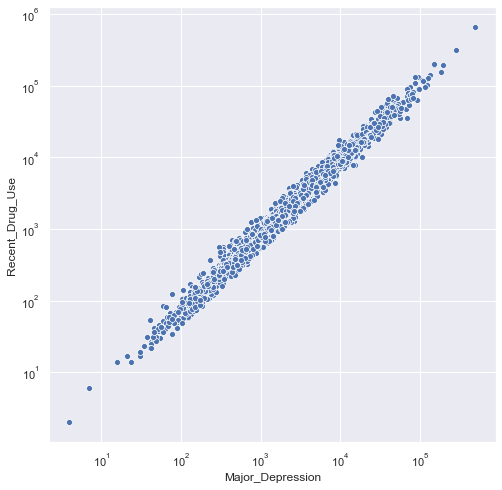

In [38]:
Plot1=sns.scatterplot(x='Major_Depression', y='Recent_Drug_Use', data=PSU_Demo_VPEH_df)
Plot1.set_yscale('log')
Plot1.set_xscale('log')
print("Strong Correlation of Depression & Drug Usage Causation or Correlation?")

# Summary Measures of Health 

In [39]:
df_SMOH=pd.read_csv('SUMMARYMEASURESOFHEALTH.csv')
ForUse=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number']
UsefulCols=['ALE', 'All_Death', 'Health_Status', 'Unhealthy_Days']
df_SMOH[df_SMOH[UsefulCols]<0]=np.nan
df_SMOH=df_SMOH[ForUse+UsefulCols]
PSU_Demo_VPEH_df=PSU_Demo_VPEH_df[['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name',
 'CHSI_State_Abbr', 'Strata_ID_Number', 'FluB_Rpt', 'HepA_Rpt', 'HepB_Rpt', 
 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt',      
 'Syphilis_Rpt', 'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax',
 'Flu_Vac', 'Population_Size',
 'Population_Density', 'Poverty', 'Age_19_Under', 'Age_19_64',
 'Age_65_84', 'Age_85_and_Over', 'White', 'Black', 'Native_American',
 'Asian', 'Hispanic', 'No_HS_Diploma', 'Unemployed', 'Sev_Work_Disabled',
 'Major_Depression', 'Recent_Drug_Use', 'Ecol_Rpt', 'Salm_Rpt',
 'Shig_Rpt', 'Toxic_Chem', 'No_HS_Diploma%', 'Unemployed%',
 'Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%',
 'FluB_Rpt%', 'HepA_Rpt%', 'HepB_Rpt%',
 'Meas_Rpt%', 'Pert_Rpt%', 'CRS_Rpt%', 'Syphilis_Rpt%', 'Pap_Smear%',
 'Mammogram%', 'Proctoscopy%', 'Pneumo_Vax%', 'Flu_Vac%']]
df_SMOH.columns
PSU_Demo_VPEH_SMOH_df=PSU_Demo_VPEH_df.merge(df_SMOH, on=['State_FIPS_Code', 'County_FIPS_Code'], how='left', indicator=True)
PSU_Demo_VPEH_SMOH_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name_x',
       'CHSI_State_Name_x', 'CHSI_State_Abbr_x', 'Strata_ID_Number_x',
       'FluB_Rpt', 'HepA_Rpt', 'HepB_Rpt', 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt',
       'Syphilis_Rpt', 'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax',
       'Flu_Vac', 'Population_Size', 'Population_Density', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_HS_Diploma',
       'Unemployed', 'Sev_Work_Disabled', 'Major_Depression',
       'Recent_Drug_Use', 'Ecol_Rpt', 'Salm_Rpt', 'Shig_Rpt', 'Toxic_Chem',
       'No_HS_Diploma%', 'Unemployed%', 'Sev_Work_Disabled%',
       'Major_Depression%', 'Recent_Drug_Use%', 'FluB_Rpt%', 'HepA_Rpt%',
       'HepB_Rpt%', 'Meas_Rpt%', 'Pert_Rpt%', 'CRS_Rpt%', 'Syphilis_Rpt%',
       'Pap_Smear%', 'Mammogram%', 'Proctoscopy%', 'Pneumo_Vax%', 'Flu_Vac%',
       'CHSI_County_Name_y', 'CHSI_State_Name_y', 'CHSI_St

Text(0.5, 0.98, 'Poverty & Number of Deaths in a county are positively correlated')

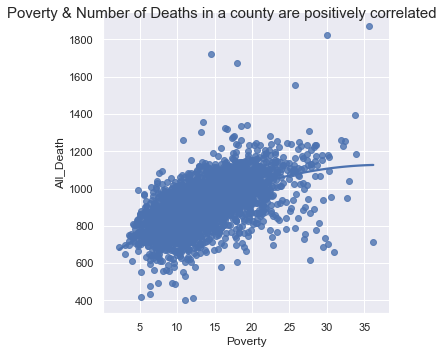

In [40]:
ax1=sns.lmplot('Poverty', 'All_Death', data=PSU_Demo_VPEH_SMOH_df, ci=None, order=2, truncate=True, palette="Set1")
fig = ax1.fig 
fig.suptitle("Poverty & Number of Deaths in a county are positively correlated", fontsize=15)

Text(0.5, 0.98, 'Poverty & Average Life Expectancy in a county are negatively correlated')

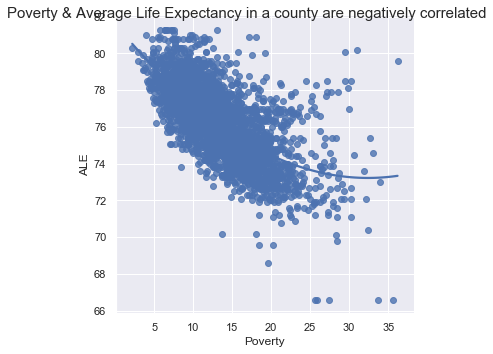

In [41]:
ax2=sns.lmplot('Poverty', 'ALE', data=PSU_Demo_VPEH_SMOH_df, ci=None, order=2, truncate=True, palette="Set1")
fig = ax2.fig 
fig.suptitle("Poverty & Average Life Expectancy in a county are negatively correlated", fontsize=15)

# Risk Factors & Access to Care

In [42]:
RFAC=pd.read_csv('RISKFACTORSANDACCESSTOCARE.csv')
RFAC=RFAC[['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr'
           , 'Strata_ID_Number', 'No_Exercise', 'Few_Fruit_Veg','Obesity', 'High_Blood_Pres',
           'Smoker', 'Diabetes', 'Uninsured','Elderly_Medicare', 'Disabled_Medicare', 
           'Prim_Care_Phys_Rate','Dentist_Rate']]
HandleNanCols=['No_Exercise', 'Few_Fruit_Veg','Obesity', 'High_Blood_Pres',
           'Smoker', 'Diabetes', 'Uninsured','Elderly_Medicare', 'Disabled_Medicare', 
           'Prim_Care_Phys_Rate','Dentist_Rate']
RFAC[RFAC[HandleNanCols]<0]=np.nan
PSU_Demo_VPEH_SMOH_df= PSU_Demo_VPEH_SMOH_df[['State_FIPS_Code', 'County_FIPS_Code',
       'FluB_Rpt', 'HepA_Rpt', 'HepB_Rpt', 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt',
       'Syphilis_Rpt', 'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax',
       'Flu_Vac', 'Population_Size', 'Population_Density', 'Poverty',
       'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic', 'No_HS_Diploma',
       'Unemployed', 'Sev_Work_Disabled', 'Major_Depression',
       'Recent_Drug_Use', 'Ecol_Rpt', 'Salm_Rpt', 'Shig_Rpt', 'Toxic_Chem',
       'No_HS_Diploma%', 'Unemployed%', 'Sev_Work_Disabled%',
       'Major_Depression%', 'Recent_Drug_Use%', 'FluB_Rpt%', 'HepA_Rpt%',
       'HepB_Rpt%', 'Meas_Rpt%', 'Pert_Rpt%', 'CRS_Rpt%', 'Syphilis_Rpt%',
       'Pap_Smear%', 'Mammogram%', 'Proctoscopy%', 'Pneumo_Vax%', 'Flu_Vac%',
       'ALE', 'All_Death', 'Health_Status',
       'Unhealthy_Days']]
PSU_Demo_VPEH_SMOH_RFAC_df=RFAC.merge(PSU_Demo_VPEH_SMOH_df, on=['State_FIPS_Code', 'County_FIPS_Code'], how='left', indicator=True)
PSU_Demo_VPEH_SMOH_RFAC_df.columns


Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare',
       'Prim_Care_Phys_Rate', 'Dentist_Rate', 'FluB_Rpt', 'HepA_Rpt',
       'HepB_Rpt', 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt', 'Syphilis_Rpt',
       'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax', 'Flu_Vac',
       'Population_Size', 'Population_Density', 'Poverty', 'Age_19_Under',
       'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black',
       'Native_American', 'Asian', 'Hispanic', 'No_HS_Diploma', 'Unemployed',
       'Sev_Work_Disabled', 'Major_Depression', 'Recent_Drug_Use', 'Ecol_Rpt',
       'Salm_Rpt', 'Shig_Rpt', 'Toxic_Chem', 'No_HS_Diploma%', 'Unemployed%',
       'Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%',
       'FluB_Rpt%', 'HepA_Rpt%', 'HepB_Rpt%', 'Meas_Rp

C:\ProgramData\Anaconda3\envs\cs418env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\envs\cs418env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


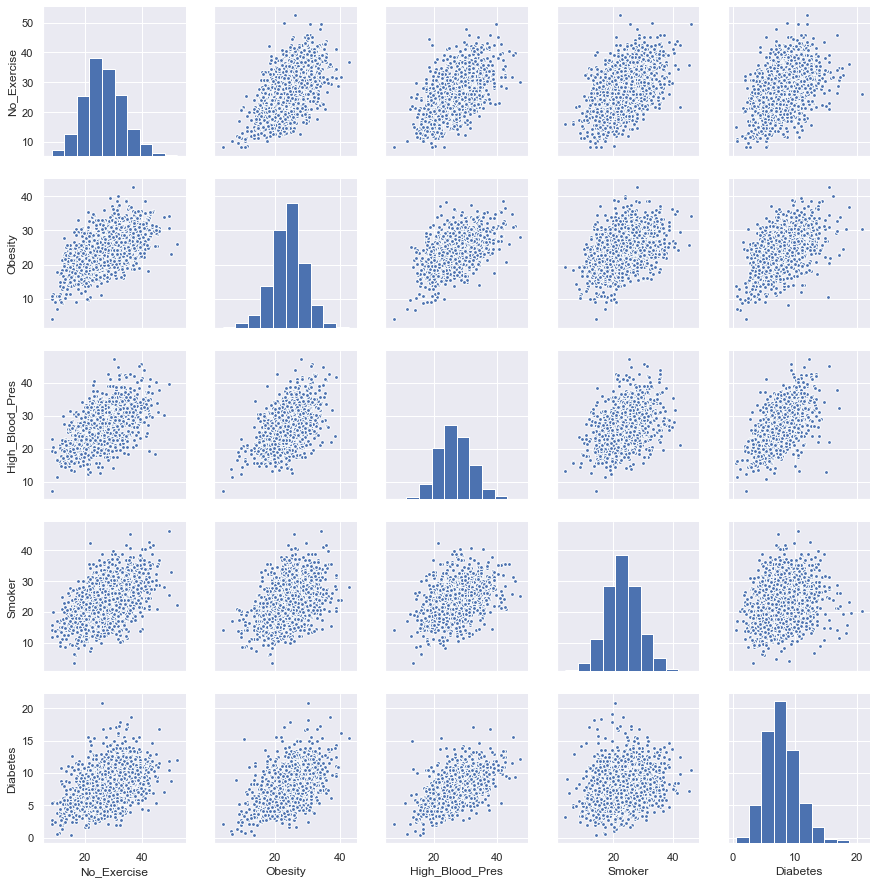

In [43]:
iris=PSU_Demo_VPEH_SMOH_RFAC_df[['No_Exercise','Obesity', 'High_Blood_Pres',
           'Smoker', 'Diabetes']]
g = sns.PairGrid(iris)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=15)

Text(0.5, 1.0, 'Obesity among States')

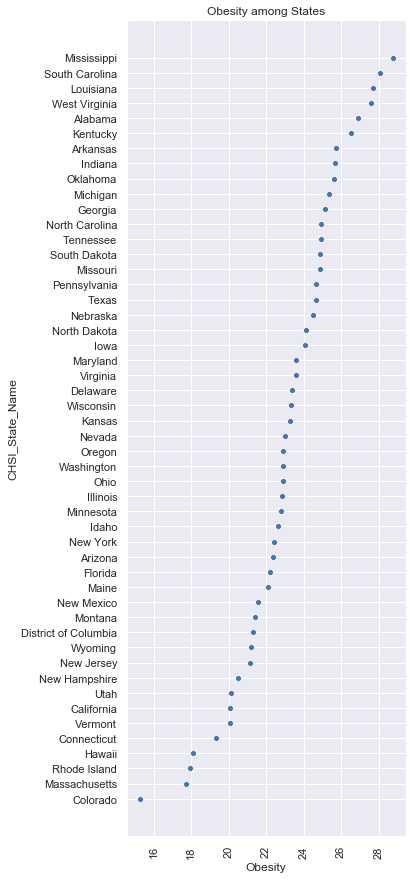

In [44]:
Obesity_df=PSU_Demo_VPEH_SMOH_RFAC_df[['Obesity']].groupby(PSU_Demo_VPEH_SMOH_RFAC_df['CHSI_State_Name']).mean().sort_values(by=['Obesity'])
sns.set(rc={'figure.figsize':(5,15)})
chart = sns.scatterplot(y=Obesity_df.index, x="Obesity", data=Obesity_df)
plt.xticks(rotation=90)
plt.title('Obesity among States')

Text(0.5, 1.0, 'PCT(%) of People who exercise among States')

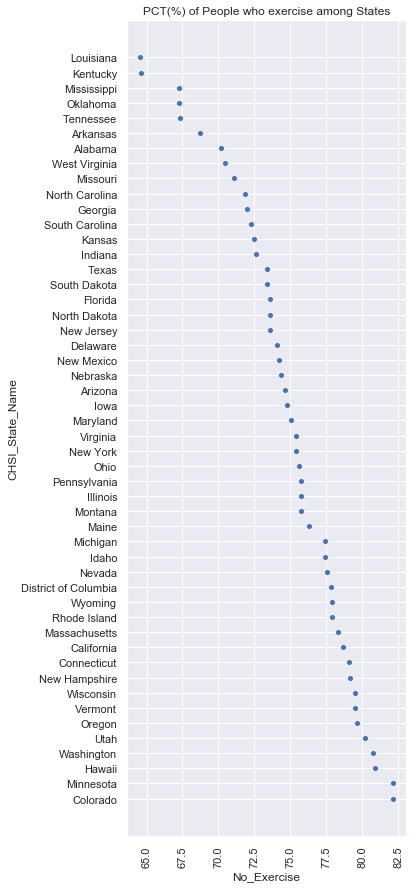

In [45]:
No_Exercise_df=PSU_Demo_VPEH_SMOH_RFAC_df[['No_Exercise']].groupby(PSU_Demo_VPEH_SMOH_RFAC_df['CHSI_State_Name']).mean().sort_values(by=['No_Exercise'])
No_Exercise_df['No_Exercise']=100-No_Exercise_df['No_Exercise']
sns.set(rc={'figure.figsize':(5,15)})
chart = sns.scatterplot(y=No_Exercise_df.index, x="No_Exercise", data=No_Exercise_df)
plt.xticks(rotation=90)
plt.title('PCT(%) of People who exercise among States')

In [46]:
PSU_Demo_VPEH_SMOH_RFAC_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare',
       'Prim_Care_Phys_Rate', 'Dentist_Rate', 'FluB_Rpt', 'HepA_Rpt',
       'HepB_Rpt', 'Meas_Rpt', 'Pert_Rpt', 'CRS_Rpt', 'Syphilis_Rpt',
       'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax', 'Flu_Vac',
       'Population_Size', 'Population_Density', 'Poverty', 'Age_19_Under',
       'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black',
       'Native_American', 'Asian', 'Hispanic', 'No_HS_Diploma', 'Unemployed',
       'Sev_Work_Disabled', 'Major_Depression', 'Recent_Drug_Use', 'Ecol_Rpt',
       'Salm_Rpt', 'Shig_Rpt', 'Toxic_Chem', 'No_HS_Diploma%', 'Unemployed%',
       'Sev_Work_Disabled%', 'Major_Depression%', 'Recent_Drug_Use%',
       'FluB_Rpt%', 'HepA_Rpt%', 'HepB_Rpt%', 'Meas_Rp

# Measures of Birth & Death

In [47]:
MOBAD=pd.read_csv('MEASURESOFBIRTHANDDEATH.csv')
MOBAD.columns
UsefulCols=[
"LBW",
"VLBW",
"Premature",
"Under_18",
"Over_40",
"Unmarried",
"Late_Care",
"Infant_Mortality",
"IM_Neonatal",
"IM_Postneonatal",
"Brst_Cancer",
"Col_Cancer",
"CHD",
"Homicide",
"Lung_Cancer",
"MVA",
"Stroke",
"Suicide",
"Injury",
"Total_Births",
"Total_Deaths"]
ForUse=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number']
MOBAD[MOBAD[UsefulCols]<0]=np.nan
MOBAD=MOBAD[ForUse+UsefulCols]
#####################################################################################
PSU_Demo_VPEH_SMOH_RFAC_df=PSU_Demo_VPEH_SMOH_RFAC_df.drop(columns=['_merge'])
PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df=PSU_Demo_VPEH_SMOH_RFAC_df.merge(MOBAD, on=['State_FIPS_Code', 'County_FIPS_Code'], how='left', indicator=True)
####converttopercent###########
PCT=["Infant_Mortality",
"IM_Neonatal",
"IM_Postneonatal",
"Brst_Cancer",
"Col_Cancer",
"CHD",
"Homicide",
"Lung_Cancer",
"MVA",
"Stroke",
"Suicide",
"Injury",
"Total_Births",
"Total_Deaths"]

i=0
for i in range(0,len(PCT)):
    name=PCT[i]+"%"
    PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df[name]=PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df[PCT[i]]/PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df['Population_Size']

Text(0.5, 1.0, 'Distribution of Infant_Mortality - PostNeonantal Variable')

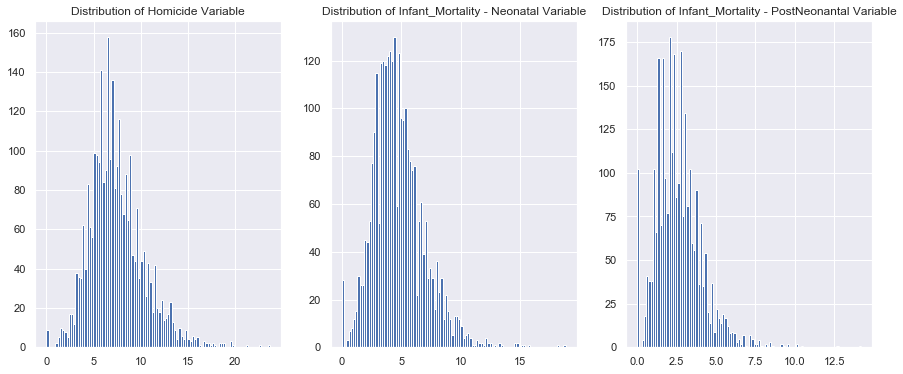

In [48]:
#IM
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

ax1=fig.add_subplot(1,3,1)
MOBAD['Infant_Mortality'].hist(bins=100,ax=ax1)
ax1.set_title("Distribution of Homicide Variable")

ax2=fig.add_subplot(1,3,2)
MOBAD['IM_Neonatal'].hist(bins=100,ax=ax2)
ax2.set_title("Distribution of Infant_Mortality - Neonatal Variable")

ax3=fig.add_subplot(1,3,3)
MOBAD['IM_Postneonatal'].hist(bins=100,ax=ax3)
ax3.set_title("Distribution of Infant_Mortality - PostNeonantal Variable")


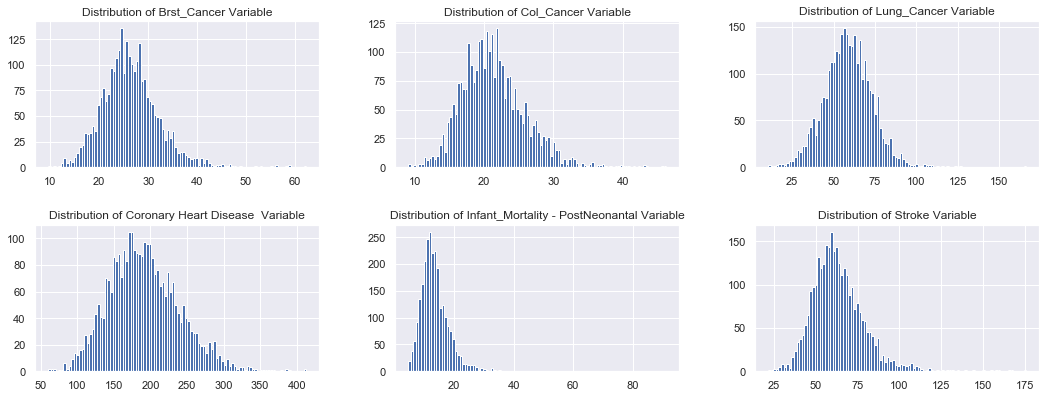

In [49]:
#Diseases
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

ax1=fig.add_subplot(2,3,1)
MOBAD['Brst_Cancer'].hist(bins=100,ax=ax1)
ax1.set_title("Distribution of Brst_Cancer Variable")

ax2=fig.add_subplot(2,3,2)
MOBAD['Col_Cancer'].hist(bins=100,ax=ax2)
ax2.set_title("Distribution of Col_Cancer Variable")

ax3=fig.add_subplot(2,3,3)
MOBAD['Lung_Cancer'].hist(bins=100,ax=ax3)
ax3.set_title("Distribution of Lung_Cancer Variable")

ax4=fig.add_subplot(2,3,4)
MOBAD['CHD'].hist(bins=100,ax=ax4)
ax4.set_title("Distribution of Coronary Heart Disease  Variable")

ax5=fig.add_subplot(2,3,5)
MOBAD['Suicide'].hist(bins=100,ax=ax5)
ax5.set_title("Distribution of Infant_Mortality - PostNeonantal Variable")

ax6=fig.add_subplot(2,3,6)
MOBAD['Stroke'].hist(bins=100,ax=ax6)
ax6.set_title("Distribution of Stroke Variable")
plt.tight_layout(pad=2, w_pad=2, h_pad=2.0)

Text(0.5, 1.0, 'Total Number of Deaths & Number of People UnInsured are Correlated (Log Scale)')

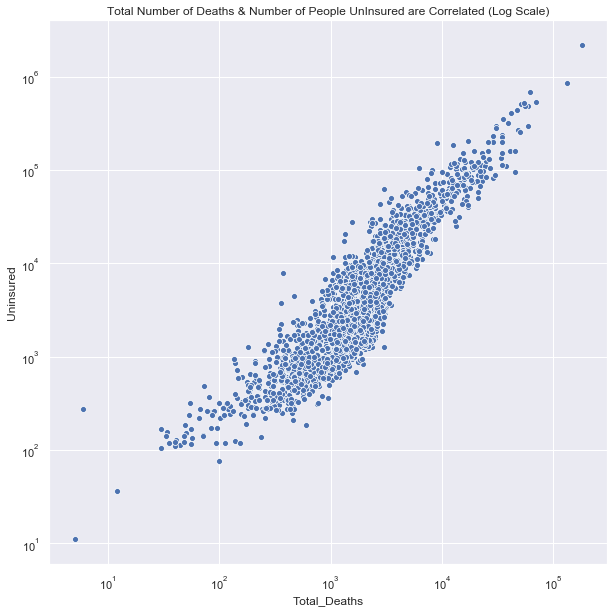

In [50]:
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.scatterplot('Total_Deaths', 'Uninsured', data=PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Total Number of Deaths & Number of People UnInsured are Correlated (Log Scale)")

Text(0.5, 1.0, 'Obesity Vs Number of People who got coronory heart disease - Positive Correlation')

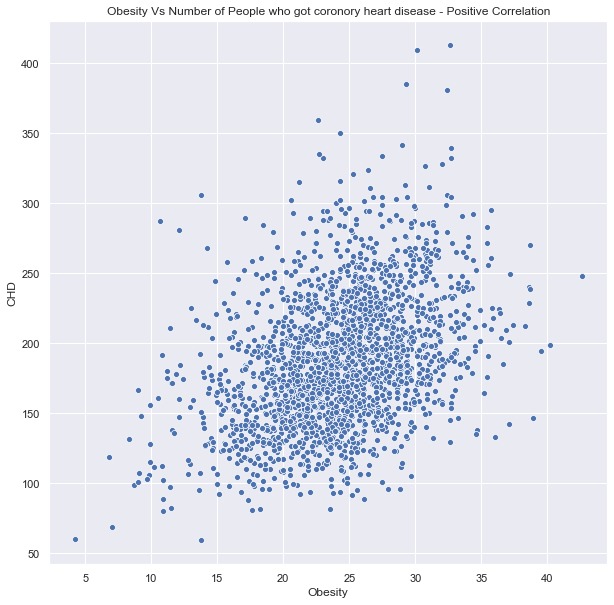

In [118]:
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.scatterplot('Obesity', 'CHD', data=PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title("Obesity Vs Number of People who got coronory heart disease - Positive Correlation")

In [51]:
list(PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df.columns)

['State_FIPS_Code',
 'County_FIPS_Code',
 'CHSI_County_Name_x',
 'CHSI_State_Name_x',
 'CHSI_State_Abbr_x',
 'Strata_ID_Number_x',
 'No_Exercise',
 'Few_Fruit_Veg',
 'Obesity',
 'High_Blood_Pres',
 'Smoker',
 'Diabetes',
 'Uninsured',
 'Elderly_Medicare',
 'Disabled_Medicare',
 'Prim_Care_Phys_Rate',
 'Dentist_Rate',
 'FluB_Rpt',
 'HepA_Rpt',
 'HepB_Rpt',
 'Meas_Rpt',
 'Pert_Rpt',
 'CRS_Rpt',
 'Syphilis_Rpt',
 'Pap_Smear',
 'Mammogram',
 'Proctoscopy',
 'Pneumo_Vax',
 'Flu_Vac',
 'Population_Size',
 'Population_Density',
 'Poverty',
 'Age_19_Under',
 'Age_19_64',
 'Age_65_84',
 'Age_85_and_Over',
 'White',
 'Black',
 'Native_American',
 'Asian',
 'Hispanic',
 'No_HS_Diploma',
 'Unemployed',
 'Sev_Work_Disabled',
 'Major_Depression',
 'Recent_Drug_Use',
 'Ecol_Rpt',
 'Salm_Rpt',
 'Shig_Rpt',
 'Toxic_Chem',
 'No_HS_Diploma%',
 'Unemployed%',
 'Sev_Work_Disabled%',
 'Major_Depression%',
 'Recent_Drug_Use%',
 'FluB_Rpt%',
 'HepA_Rpt%',
 'HepB_Rpt%',
 'Meas_Rpt%',
 'Pert_Rpt%',
 'CRS_Rpt%',

<center> <h1 style="color:blue;">8. Modeling</h1> </center>


In [52]:
from sklearn.model_selection import train_test_split
X1=[
 'No_Exercise',
 'Few_Fruit_Veg',
 'Obesity',
 'High_Blood_Pres',
 'Smoker',
 'Uninsured',
 
 'Elderly_Medicare',
 'Disabled_Medicare',
 'Prim_Care_Phys_Rate',
 'Dentist_Rate',
 
 'FluB_Rpt',
 'HepA_Rpt',
 'HepB_Rpt',
 'Meas_Rpt',
 'Pert_Rpt',
 'CRS_Rpt',
 'Syphilis_Rpt',
 'FluB_Rpt%',
 'HepA_Rpt%',
 'HepB_Rpt%',
 'Meas_Rpt%',
 'Pert_Rpt%',
 'CRS_Rpt%',
 'Syphilis_Rpt%',
 
 
 'Pap_Smear',
 'Mammogram',
 'Proctoscopy',
 'Pneumo_Vax',
 'Flu_Vac',
 'Pap_Smear%',
 'Mammogram%',
 'Proctoscopy%',
 'Pneumo_Vax%',
 'Flu_Vac%',
 
 
 'Population_Size',
 'Population_Density',
 'Poverty',
 
 'Age_19_Under',
 'Age_19_64',
 'Age_65_84',
 'Age_85_and_Over',
 
 'White',
 'Black',
 'Native_American',
 'Asian',
 'Hispanic',
 
 'No_HS_Diploma',
 'No_HS_Diploma%',
 
 'Unemployed',
 'Unemployed%',
 
 'Sev_Work_Disabled',
 'Sev_Work_Disabled%',
 
 'Major_Depression',
 'Major_Depression%',
 
 'Recent_Drug_Use',
 'Recent_Drug_Use%',
 
 'Ecol_Rpt',
 'Salm_Rpt',
 'Shig_Rpt',
 
 'Toxic_Chem',
 
 #'All_Death',
 'Health_Status',
 'Unhealthy_Days',
 
 'LBW',
 'VLBW',
 'Premature',
 'Under_18',
 
 'Total_Births',
 'Total_Deaths',
 
 'Total_Births%',
 'Total_Deaths%',
 
 'Over_40',
 'Unmarried',
 'Late_Care',
 
 'Infant_Mortality',
 'IM_Neonatal',
 'IM_Postneonatal',

 'Homicide',
 'Homicide%',
 ]


In [53]:
mlmodel=PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df.copy()

In [54]:
def machinelearning(X1,y):
    from sklearn.metrics import accuracy_score
    from sklearn import metrics
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators = 1000,
                               n_jobs = -1,
                               oob_score = True,
                               bootstrap = True,
                               criterion='mse')
    
    print("------------------Data Specs-------------------------")
    
    print("Amount of Training Data", len(X_train))
    print("Amount of Training Labels Data", len(y_train))
    
    print("Amount of Testing Data", len(X_valid))
    print("Amount of Testing Labels Data", len(y_valid))
    
    print("-------------------------------------------------------\n\n")
    rf.fit(X_train, y_train)

    forest=rf
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]    
    
    cols=X.columns
    Newdf=pd.DataFrame()
    Newdf['cols']=list(cols)
    Newdf['indices']=list(indices)
    Newdf['importances']=list(importances)
    Newdf=Newdf.sort_values(['importances'], ascending=False)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plt.bar(Newdf.cols, Newdf.importances)
    plt.title("Feature importances")
    plt.xticks(rotation=90)
    # Print the feature ranking
    result=(rf.score(X_train, y_train), rf.oob_score_,rf.score(X_valid, y_valid))
    ###########################################################3
    predictions = rf.predict(X_train)
    error=abs(predictions - y_train)
    print('Train Mean Absolute Error:', round(np.mean(error), 2))
    print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
    
    predictions = rf.predict(X_valid)
    # Calculate the absolute errors
    errors = abs(predictions - y_valid)
    # Print out the mean absolute error (mae)
    print('Test Mean Absolute Error:', round(np.mean(errors), 2))
    print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))
    print("\n\n\n")
    print("Feature ranking:")
   
    return(result,Newdf.cols[:10])

## We will try to predict each of these using the predictor attributes and find out which are the most important ones in determining these
['ALE','Diabetes','Lung_Cancer','Brst_Cancer','Col_Cancer','Brst_Cancer%','Col_Cancer%','Lung_Cancer%','MVA','MVA%','Stroke','Stroke%', 'Suicide','Suicide%','Injury','Injury%','CHD','CHD%']


In [55]:
ToBePredicted=['ALE','Diabetes','Lung_Cancer','Brst_Cancer','Col_Cancer','Brst_Cancer%','Col_Cancer%','Lung_Cancer%','MVA','MVA%','Stroke','Stroke%', 'Suicide','Suicide%','Injury','Injury%','CHD','CHD%']
print(ToBePredicted)

['ALE', 'Diabetes', 'Lung_Cancer', 'Brst_Cancer', 'Col_Cancer', 'Brst_Cancer%', 'Col_Cancer%', 'Lung_Cancer%', 'MVA', 'MVA%', 'Stroke', 'Stroke%', 'Suicide', 'Suicide%', 'Injury', 'Injury%', 'CHD', 'CHD%']


------------------Data Specs-------------------------
Amount of Training Data 2197
Amount of Training Labels Data 2197
Amount of Testing Data 942
Amount of Testing Labels Data 942
-------------------------------------------------------


Train Mean Absolute Error: 0.26
Train Root Mean Squared Error: 0.3613043750170075
Test Mean Absolute Error: 0.71
Test Root Mean Squared Error: 0.9773286050073277




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  ALE Attribute
Attribute which is Predicted: ALE 

Predictor Columns


 36               Poverty
47        No_HS_Diploma%
65              Under_18
42                 Black
70               Over_40
41                 White
4                 Smoker
45              Hispanic
40       Age_85_and_Over
51    Sev_Work_Disabled%
Name: cols, dtype: object


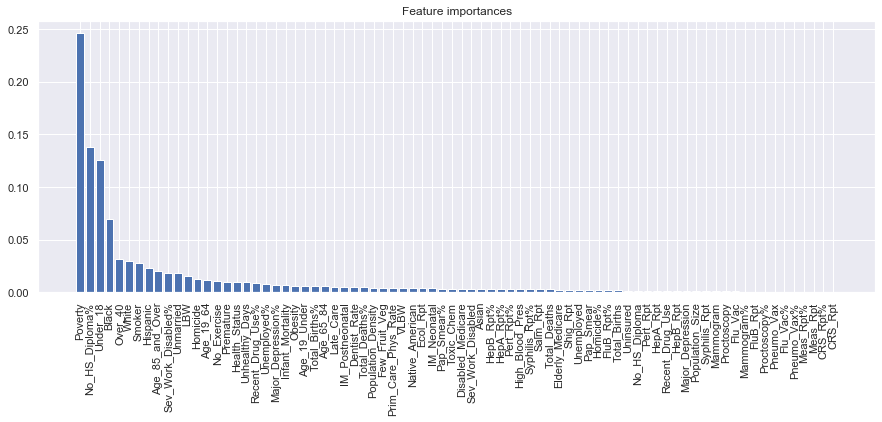

In [56]:
colname=ToBePredicted[0]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1903
Amount of Training Labels Data 1903
Amount of Testing Data 816
Amount of Testing Labels Data 816
-------------------------------------------------------


Train Mean Absolute Error: 0.6
Train Root Mean Squared Error: 0.8141020036899451
Test Mean Absolute Error: 1.69
Test Root Mean Squared Error: 2.291404002919518




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Diabetes Attribute
Attribute which is Predicted: Diabetes 

Predictor Columns


 60       Health_Status
2              Obesity
47      No_HS_Diploma%
71           Unmarried
36             Poverty
55    Recent_Drug_Use%
65            Under_18
74         IM_Neonatal
3      High_Blood_Pres
63                VLBW
Name: cols, dtype: object


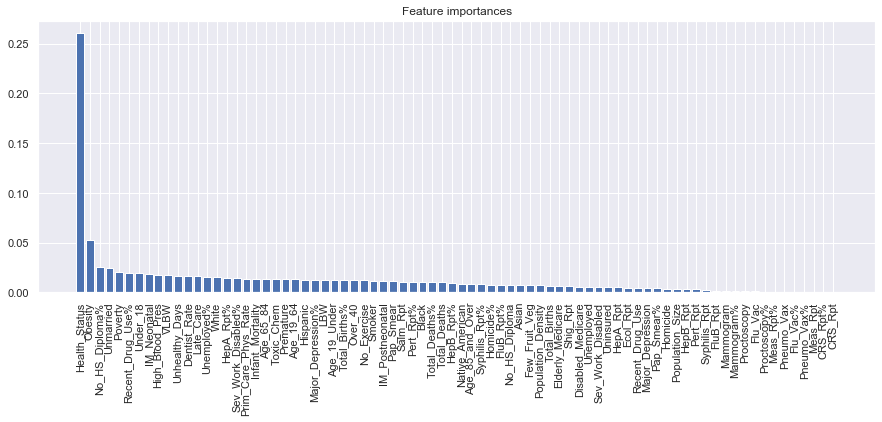

In [57]:
colname=ToBePredicted[1]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1895
Amount of Training Labels Data 1895
Amount of Testing Data 813
Amount of Testing Labels Data 813
-------------------------------------------------------


Train Mean Absolute Error: 2.53
Train Root Mean Squared Error: 3.3582206479427734
Test Mean Absolute Error: 6.39
Test Root Mean Squared Error: 8.408683619966256




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Lung_Cancer Attribute
Attribute which is Predicted: Lung_Cancer 

Predictor Columns


 4                 Smoker
47        No_HS_Diploma%
51    Sev_Work_Disabled%
71             Unmarried
45              Hispanic
65              Under_18
42                 Black
61        Unhealthy_Days
40       Age_85_and_Over
70               Over_40
Name: cols, dtype: object


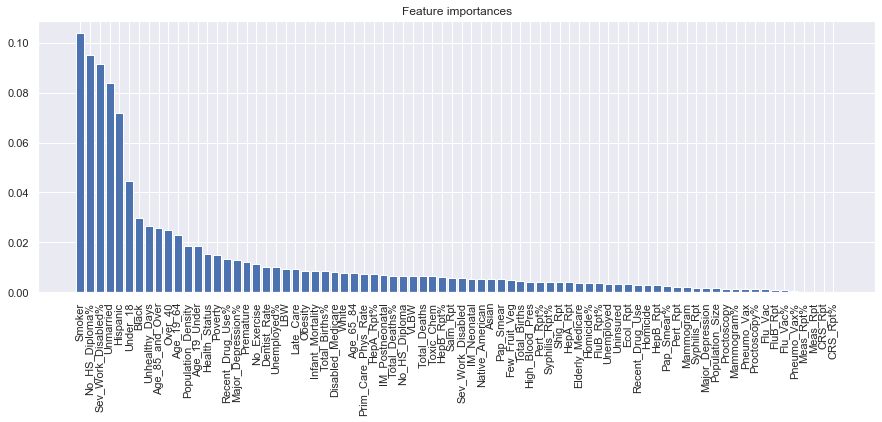

In [58]:
colname=ToBePredicted[2]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1771
Amount of Training Labels Data 1771
Amount of Testing Data 759
Amount of Testing Labels Data 759
-------------------------------------------------------


Train Mean Absolute Error: 1.51
Train Root Mean Squared Error: 1.968586008523157
Test Mean Absolute Error: 3.94
Test Root Mean Squared Error: 5.0918501327889265




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Brst_Cancer Attribute
Attribute which is Predicted: Brst_Cancer 

Predictor Columns


 42                  Black
67           Total_Deaths
49            Unemployed%
48             Unemployed
34        Population_Size
55       Recent_Drug_Use%
6        Elderly_Medicare
8     Prim_Care_Phys_Rate
71              Unmarried
52       Major_Depression
Name: cols, dtype: object


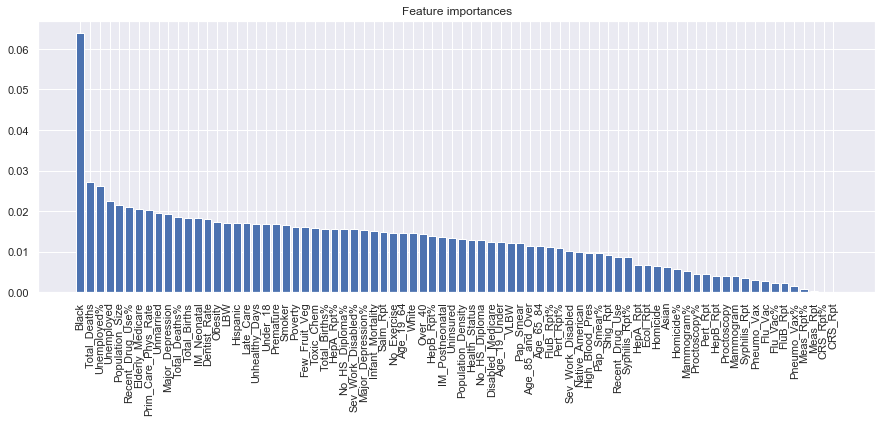

In [59]:
colname=ToBePredicted[3]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1757
Amount of Training Labels Data 1757
Amount of Testing Data 754
Amount of Testing Labels Data 754
-------------------------------------------------------


Train Mean Absolute Error: 1.08
Train Root Mean Squared Error: 1.402798237727438
Test Mean Absolute Error: 3.05
Test Root Mean Squared Error: 3.9972036435003844




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Col_Cancer Attribute
Attribute which is Predicted: Col_Cancer 

Predictor Columns


 69        Total_Deaths%
71            Unmarried
45             Hispanic
0           No_Exercise
4                Smoker
53    Major_Depression%
49          Unemployed%
57             Salm_Rpt
55     Recent_Drug_Use%
36              Poverty
Name: cols, dtype: object


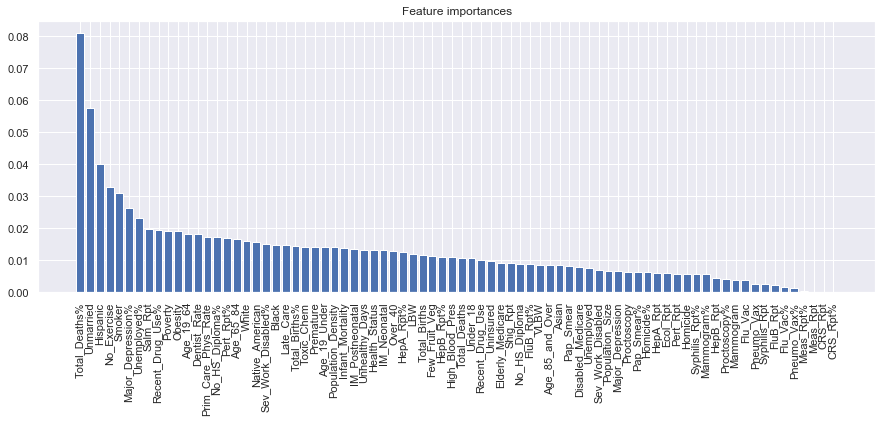

In [60]:
colname=ToBePredicted[4]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1757
Amount of Training Labels Data 1757
Amount of Testing Data 754
Amount of Testing Labels Data 754
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0002757599980812334
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0005639036407071655




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Brst_Cancer% Attribute
Attribute which is Predicted: Brst_Cancer% 

Predictor Columns


 34      Population_Size
52     Major_Depression
66         Total_Births
54      Recent_Drug_Use
48           Unemployed
7     Disabled_Medicare
5             Uninsured
2               Obesity
6      Elderly_Medicare
9          Dentist_Rate
Name: cols, dtype: object


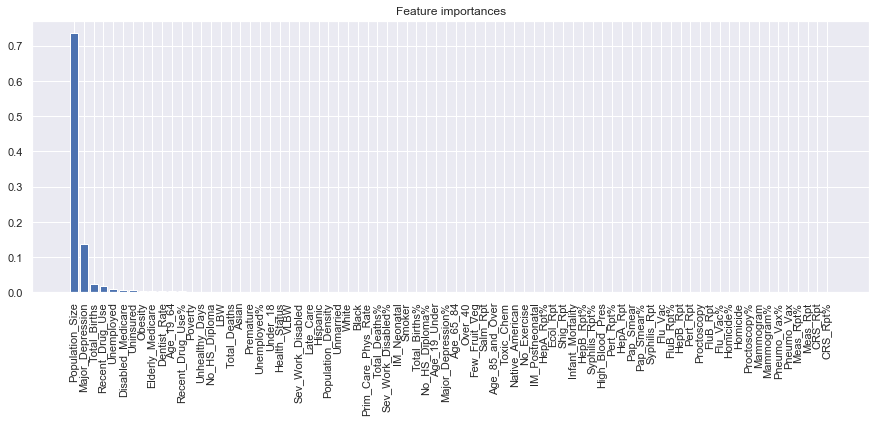

In [61]:
colname=ToBePredicted[5]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1757
Amount of Training Labels Data 1757
Amount of Testing Data 754
Amount of Testing Labels Data 754
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0002320183919314141
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.00039875946511116025




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Col_Cancer% Attribute
Attribute which is Predicted: Col_Cancer% 

Predictor Columns


 34      Population_Size
52     Major_Depression
66         Total_Births
7     Disabled_Medicare
48           Unemployed
54      Recent_Drug_Use
50    Sev_Work_Disabled
67         Total_Deaths
45             Hispanic
6      Elderly_Medicare
Name: cols, dtype: object


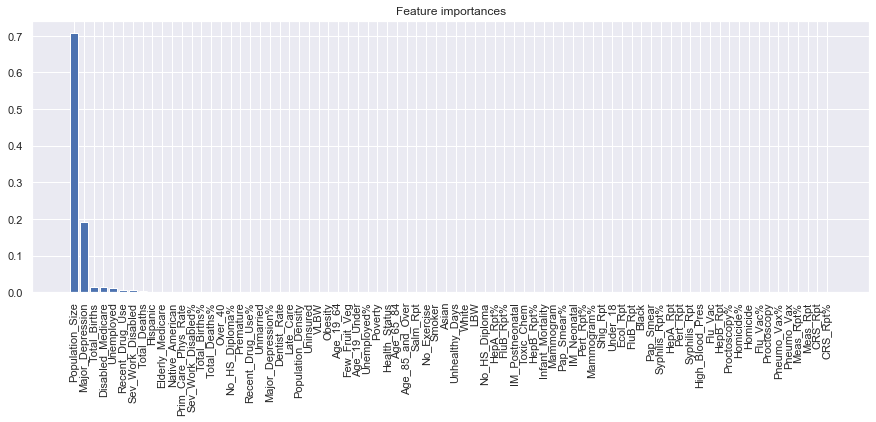

In [62]:
colname=ToBePredicted[6]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1757
Amount of Training Labels Data 1757
Amount of Testing Data 754
Amount of Testing Labels Data 754
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0003057815155890301
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0006535212956920889




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Lung_Cancer% Attribute
Attribute which is Predicted: Lung_Cancer% 

Predictor Columns


 34       Population_Size
47        No_HS_Diploma%
6       Elderly_Medicare
54       Recent_Drug_Use
69         Total_Deaths%
66          Total_Births
52      Major_Depression
36               Poverty
51    Sev_Work_Disabled%
65              Under_18
Name: cols, dtype: object


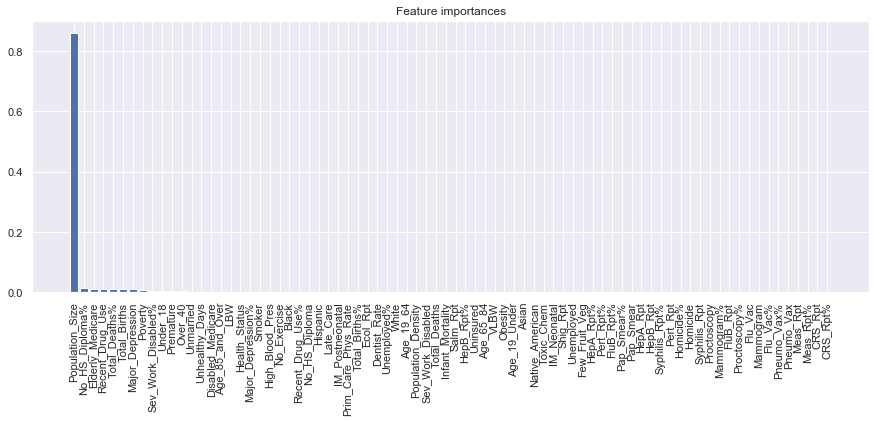

In [63]:
colname=ToBePredicted[7]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1750
Amount of Training Labels Data 1750
Amount of Testing Data 751
Amount of Testing Labels Data 751
-------------------------------------------------------


Train Mean Absolute Error: 1.66
Train Root Mean Squared Error: 2.240219932803804
Test Mean Absolute Error: 4.38
Test Root Mean Squared Error: 5.961040383243998




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  MVA Attribute
Attribute which is Predicted: MVA 

Predictor Columns


 65               Under_18
35     Population_Density
54        Recent_Drug_Use
9            Dentist_Rate
44                  Asian
68          Total_Births%
47         No_HS_Diploma%
43        Native_American
8     Prim_Care_Phys_Rate
6        Elderly_Medicare
Name: cols, dtype: object


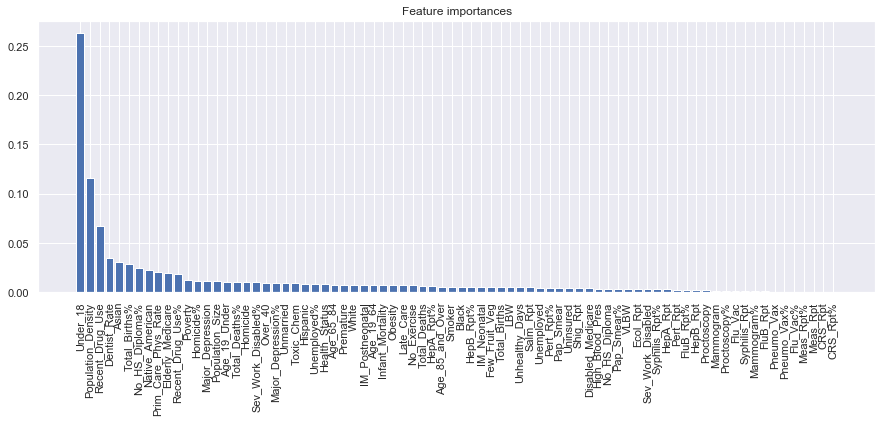

In [64]:
colname=ToBePredicted[8]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1750
Amount of Training Labels Data 1750
Amount of Testing Data 751
Amount of Testing Labels Data 751
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0003046514372368365
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0005559170471843732




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  MVA% Attribute
Attribute which is Predicted: MVA% 

Predictor Columns


 34     Population_Size
52    Major_Depression
65            Under_18
48          Unemployed
5            Uninsured
6     Elderly_Medicare
36             Poverty
9         Dentist_Rate
66        Total_Births
54     Recent_Drug_Use
Name: cols, dtype: object


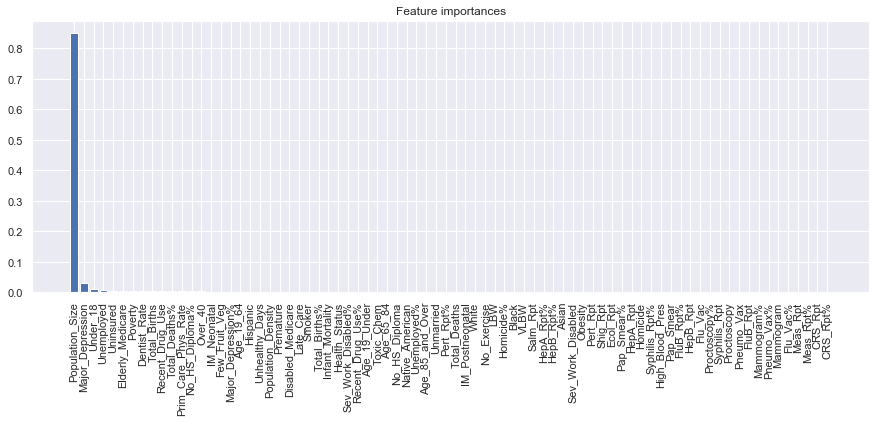

In [65]:
colname=ToBePredicted[9]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1750
Amount of Training Labels Data 1750
Amount of Testing Data 751
Amount of Testing Labels Data 751
-------------------------------------------------------


Train Mean Absolute Error: 3.44
Train Root Mean Squared Error: 4.586344748949556
Test Mean Absolute Error: 9.67
Test Root Mean Squared Error: 13.417305917471259




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Stroke Attribute
Attribute which is Predicted: Stroke 

Predictor Columns


 42                Black
70              Over_40
47       No_HS_Diploma%
64            Premature
68        Total_Births%
53    Major_Depression%
72            Late_Care
30           Mammogram%
37         Age_19_Under
45             Hispanic
Name: cols, dtype: object


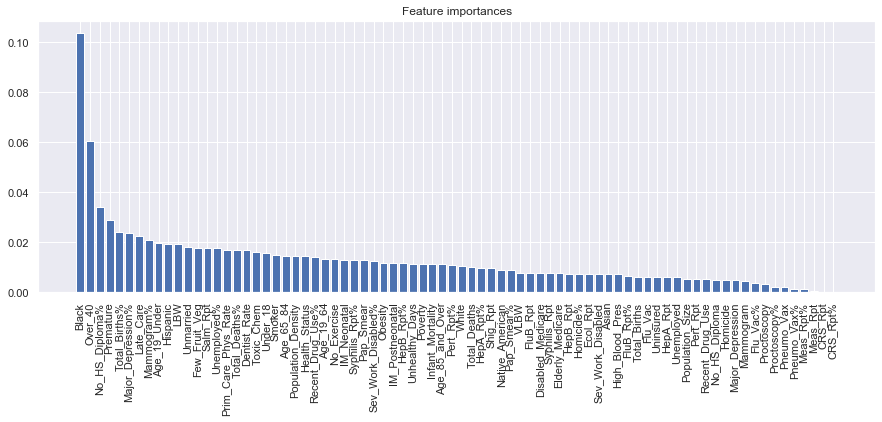

In [66]:
colname=ToBePredicted[10]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1750
Amount of Training Labels Data 1750
Amount of Testing Data 751
Amount of Testing Labels Data 751
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0004322978418913978
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0008570492200385




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Stroke% Attribute
Attribute which is Predicted: Stroke% 

Predictor Columns


 34     Population_Size
52    Major_Depression
54     Recent_Drug_Use
64           Premature
3      High_Blood_Pres
48          Unemployed
30          Mammogram%
66        Total_Births
29          Pap_Smear%
69       Total_Deaths%
Name: cols, dtype: object


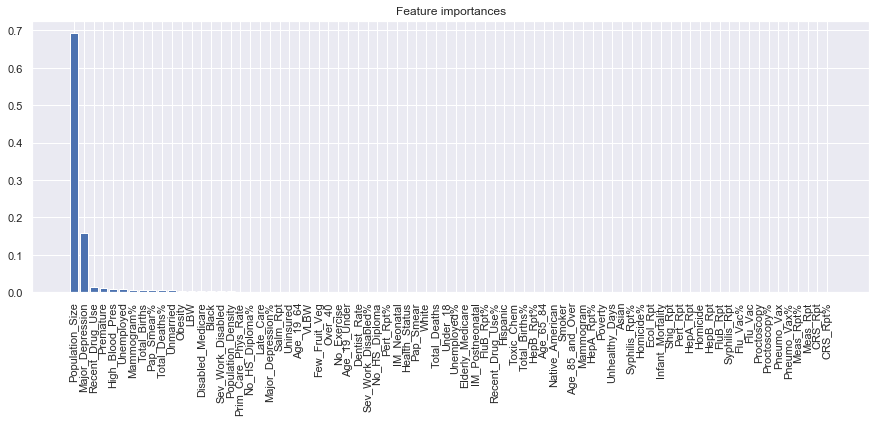

In [67]:
colname=ToBePredicted[11]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 708
Amount of Testing Labels Data 708
-------------------------------------------------------


Train Mean Absolute Error: 0.89
Train Root Mean Squared Error: 1.1581800403626776
Test Mean Absolute Error: 2.34
Test Root Mean Squared Error: 3.1249729446738423




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Suicide Attribute
Attribute which is Predicted: Suicide 

Predictor Columns


 35    Population_Density
53     Major_Depression%
39             Age_65_84
69         Total_Deaths%
43       Native_American
65              Under_18
51    Sev_Work_Disabled%
19             HepB_Rpt%
55      Recent_Drug_Use%
42                 Black
Name: cols, dtype: object


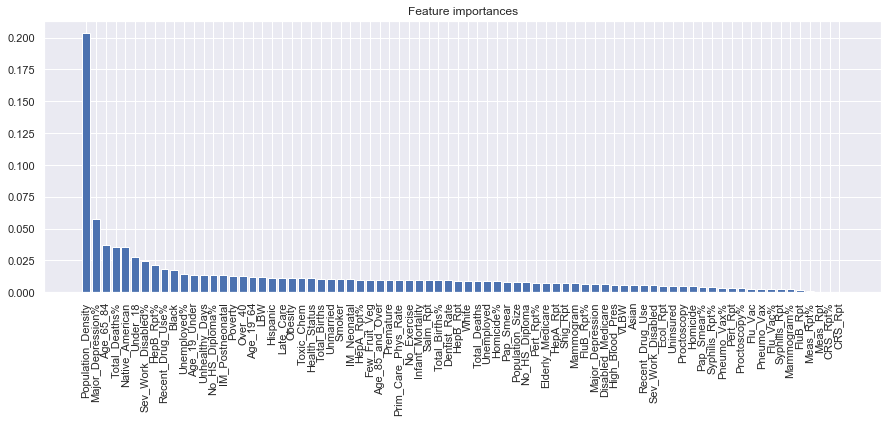

In [68]:
colname=ToBePredicted[12]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 708
Amount of Testing Labels Data 708
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.00020073347324227567
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0002090736130610865




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Suicide% Attribute
Attribute which is Predicted: Suicide% 

Predictor Columns


 34       Population_Size
48            Unemployed
66          Total_Births
35    Population_Density
52      Major_Depression
67          Total_Deaths
69         Total_Deaths%
43       Native_American
72             Late_Care
5              Uninsured
Name: cols, dtype: object


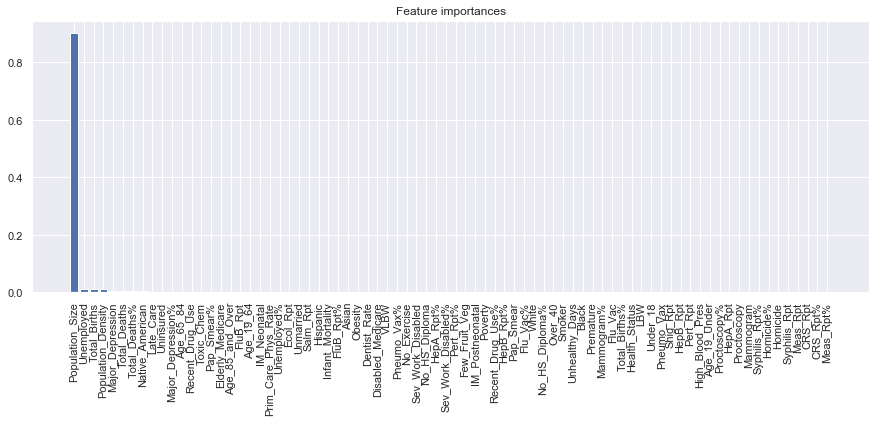

In [69]:
colname=ToBePredicted[13]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 707
Amount of Testing Labels Data 707
-------------------------------------------------------


Train Mean Absolute Error: 1.41
Train Root Mean Squared Error: 1.8599737966652514
Test Mean Absolute Error: 4.2
Test Root Mean Squared Error: 5.419991472100108




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Injury Attribute
Attribute which is Predicted: Injury 

Predictor Columns


 65              Under_18
51    Sev_Work_Disabled%
43       Native_American
47        No_HS_Diploma%
36               Poverty
53     Major_Depression%
35    Population_Density
49           Unemployed%
19             HepB_Rpt%
75       IM_Postneonatal
Name: cols, dtype: object


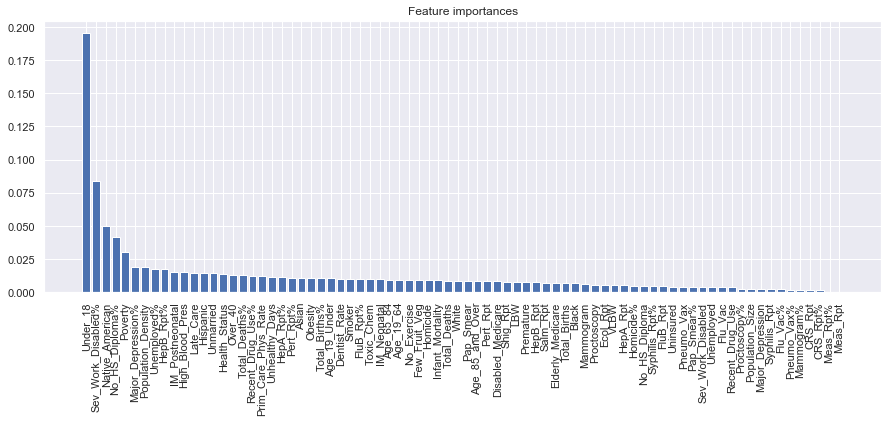

In [70]:
colname=ToBePredicted[14]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 707
Amount of Testing Labels Data 707
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0002273420439824756
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.00029458426154396967




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  Injury% Attribute
Attribute which is Predicted: Injury% 

Predictor Columns


 34       Population_Size
52      Major_Depression
6       Elderly_Medicare
36               Poverty
66          Total_Births
5              Uninsured
65              Under_18
47        No_HS_Diploma%
19             HepB_Rpt%
51    Sev_Work_Disabled%
Name: cols, dtype: object


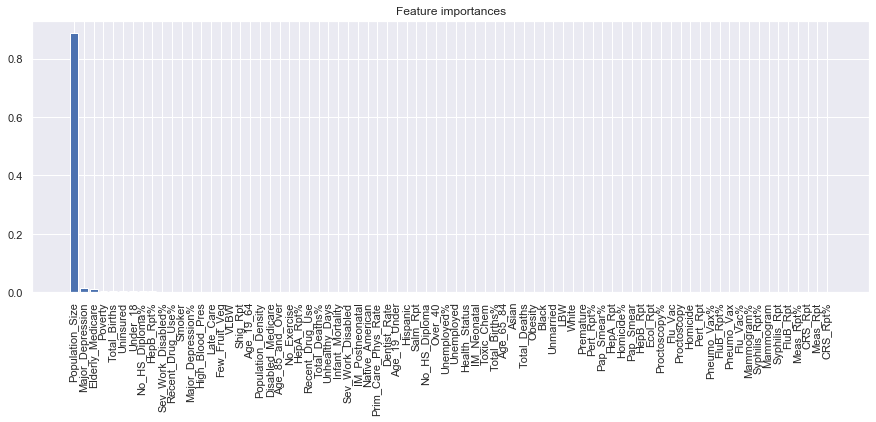

In [71]:
colname=ToBePredicted[15]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 707
Amount of Testing Labels Data 707
-------------------------------------------------------


Train Mean Absolute Error: 9.69
Train Root Mean Squared Error: 12.480624971843389
Test Mean Absolute Error: 26.6
Test Root Mean Squared Error: 34.97097468184947




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  CHD Attribute
Attribute which is Predicted: CHD 

Predictor Columns


 0           No_Exercise
47       No_HS_Diploma%
69        Total_Deaths%
4                Smoker
70              Over_40
49          Unemployed%
36              Poverty
19            HepB_Rpt%
53    Major_Depression%
60        Health_Status
Name: cols, dtype: object


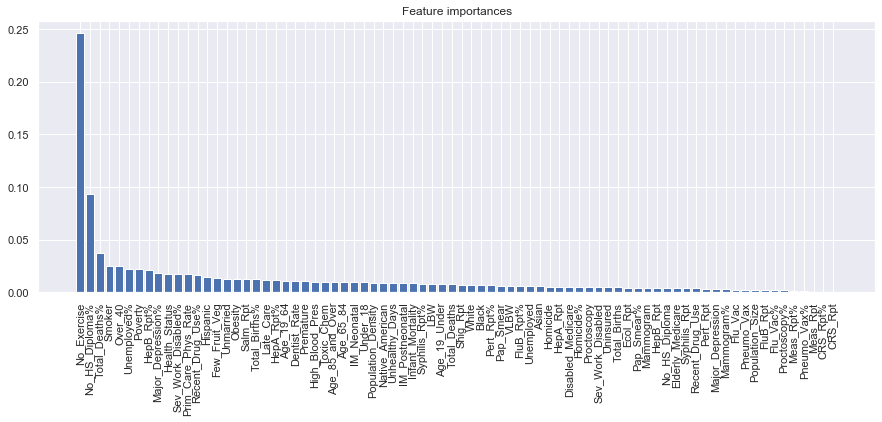

In [72]:
colname=ToBePredicted[16]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

------------------Data Specs-------------------------
Amount of Training Data 1649
Amount of Training Labels Data 1649
Amount of Testing Data 707
Amount of Testing Labels Data 707
-------------------------------------------------------


Train Mean Absolute Error: 0.0
Train Root Mean Squared Error: 0.0007671365024048187
Test Mean Absolute Error: 0.0
Test Root Mean Squared Error: 0.0020935894083955165




Feature ranking:
According to the random forest model the following variables
 are determining factors or are responsible
 for\or correlated against  CHD% Attribute
Attribute which is Predicted: CHD% 

Predictor Columns


 34     Population_Size
52    Major_Depression
54     Recent_Drug_Use
69       Total_Deaths%
61      Unhealthy_Days
47      No_HS_Diploma%
0          No_Exercise
60       Health_Status
70             Over_40
49         Unemployed%
Name: cols, dtype: object


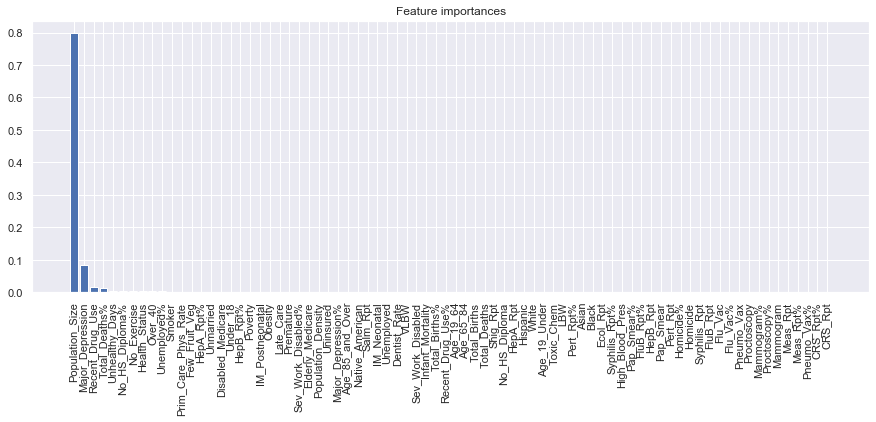

In [73]:
colname=ToBePredicted[17]
mlmodel=mlmodel.dropna(subset=[colname])
X=mlmodel[X1]
X=X.fillna(X.median())
y=mlmodel[colname].values.ravel()
result,top5=machinelearning(X1,np.array(y))
print("According to the random forest model the following variables\n are determining factors or are responsible\n for\or correlated against ", colname,"Attribute")
print("Attribute which is Predicted:", colname,"\n\nPredictor Columns\n\n\n",top5)

In [74]:
#PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df.to_csv(r'PSU_Demo_VPEH_SMOH_RFAC_MOBAD_df.csv', index = False)

In [106]:
DD[DD["COLUMN_NAME"]=="Injury"]['DESCRIPTION'].values

array(['County data, death measures, unintentional injury'], dtype=object)

<center> <h1 style="color:blue;">9 Reflection & Progress</h1> </center>
----------------------------------------------------------------------------------------------------------------------------------------
    
    
  1.What is hardest part of the project that you’ve encountered so far?

   - Since the dataset was large, constructing and merging the csv files together to have a broader look was a difficult task.
   - The dataset cleaning was minimal, but we had to impute missing and default values in every column according to basic intuitions using data science techniques.
   - The incomplete data dictionary and missing reference links made the task a little more tougher.
   - However, the hardest part was defining a concrete problem definition since the dataset consists of wide variety of health related data.
    
--------------------------------------------------------------------------------------------------------------------------------
    
    
   2. What are your initial insights?
    - We have developed a one time analysis using health status indicators to translate data into useful insights.
    - After exploring the entire dataset and understanding each and every attribute, we move on to the columns which need to be predicted ("and understand the reasons causing those 'leading causes of death' better").
    - We understand these attributes by using random forest and the calculating feature importances which outputs a list of predictor attributes which are responsible for the columns ("leading causes of death")
    - We have a lot of observations from the data which we got during our initial data explorations (Please see the exploratory data analysis part for more details)
    - Our modelling phase summarises all the model outputs with useful statistical information for all leading causes of death
   
   
Leading Causes of Death
 
     'ALE' : Average Life Expectancy
   
     'Diabetes': Diabetes
     
     'Lung_Cancer' : Lung Cancer
     
     'Brst_Cancer', : Breast Cancer
     
     'Col_Cancer', : Colon Cancer
     
     'MVA': Motor Vehicle Injuries
     
     'Stroke', : Heart(Stroke)
     
     'Suicide': Suicide
     
     'Injury' : Injuries
     
     'CHD': Coronary Heart Disease

 <h1 style="color:blue" size='1'>Exploratory Data Analysis Findings:</h1>

1. There is a positive correlation of poverty and unemployment.
2. Negative correlation of poverty and population density.
3. No relationship between poverty and depression observed.
4. Strong positive correlation between population density and depression.
5. Positive correlation between poverty and No High School Diploma Percentages. 
6. Population size and E.Colli, Salmonella and Shigella Correlated (Hygiene Related Diseases)
7. Depression & Drug Use Positive Correlation
8. Povery & Number of Deaths Positive Correlation
9. Poverty & Average Life Expectancy Negative Correlation
10. UnInsured People Vs Number of Deaths Positive Correlation
11. Depression Vs Suicide Rate Positive Correlation
12. Heart Disease Vs Obesity Positive Correlation

 <h1 style="color:blue" size='1'>Predictive Model Findings:</h1>

Findings Using Random Forest Variable Importantance:
 <font size="3"> <h1 style="color:blue" size='1'>1.  Average Life Expectancy: of people in a particular county is affected by
     </h1></font>

        Poverty Percentages in that particular county.
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Under_18: Percetange of women who give births when they are below 18 years
        Black: Percentage of blacks in that county
        Over_40: Percentage of women who give births when they are above 40 years/
        Sev_Work_Disabled%: Percentage of people who are severely work disabled

 <font size="3"> <h1 style="color:blue" size='1'>2. Diabetes: Percentage of Diabetes Cases in a county is affected by
     </h1></font>
     
        Obesity : Percentages of People in that county who are obese
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Unmarried: Percentages of people in that county who are unmarried
        Poverty: Percentage of Poverty in that county.
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage.
        Under_18: Percetange of women who give births when they are below 18 years


<font size="3"> <h1 style="color:blue" size='1'>3. Lung Cancer: Percentages of People in that county who get lung cancer is affected by
     </h1></font>
     
        Smoker: Percentage of smokers in that county.
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Poverty: Percentage of Poverty in that county.
        Major_Depression: Percentages of People who reported major depression
        Sev_Work_Disabled%: Percentage of people who are severely work disabled
        Unmarried: Percentages of people in that county who are unmarried
        Hispanic: Percentage of hispanics in that county
        Under_18: Percetange of women who give births when they are below 18 years
        Black: Percentage of blacks in that county
        Unhealthy_Days: Average Number of Unhealthy days in the past month 


<font size="3"> <h1 style="color:blue" size='1'>4. Breast Cancer: Percentages of People in that county who get breast cancer is affected by
     </h1></font>
     
        Major_Depression: Percentages of People who reported major depression
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county     
        Black: Percentage of blacks in that county
        Unemployed%: Unemployment percentages in that county.
        Population_Size: Size of the county
        Elderly_Medicare: Percentages of 65+ Ages enrolled in medicare in that county
        Prim_Care_Phys_Rate: Percentages of Primary Care Physicians in that county
        Unmarried: Percentages of people in that county who are unmarried
        Disabled_Medicare: Percentage of medicare beneficiaries (disabled)

<font size="3"> <h1 style="color:blue" size='1'>5. Colon Cancer: Percentages of People in that county who get colon cancer is affected by
     </h1></font>
     
     
        Unmarried: Percentages of people in that county who are unmarried
        Hispanic: Percentage of hispanics in that county
        No_Exercise: Percentage of people in that county who don't excercise
        Smoker: Percentage of smokers in that county.
        Major_Depression: Percentages of People who reported major depression
        Unemployed%: Unemployment percentages in that county.
        Salm_Rpt: Salmonella reported cases
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county
        Poverty: Percentage of Poverty in that county.
        Disabled_Medicare: Percentage of medicare beneficiaries (disabled)
 
<font size="3"> <h1 style="color:blue" size='1'>6. Cases of Motor Vehicle Injuries in a county is affected by
     </h1></font>
     
        Under_18: Percetange of women who give births when they are below 18 years in that county
        Population_Density: Population Density of that county
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county     
        Asian: Percentage of asians in that county
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Major_Depression: Percentages of People who reported major depression
        Poverty: Percentage of Poverty in that county.


<font size="3"> <h1 style="color:blue" size='1'>7. Cases of Heart Stroke in a county is affected by
     </h1></font>

        Black: Percentage of blacks in that county
        Over_40: Percentage of women who give births when they are above 40 years.
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Premature: Percentages of premature births in that county.
        Mammogram: Percentages of mammograms done in that county.
        Major_Depression: Percentages of People who reported major depression in that county
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county     
        High_Blood_Pres: Percentages of people who reported high blood pressure in that county
        Pap_Smear%: Percentages of pap smear tests done in that county

<font size="3"> <h1 style="color:blue" size='1'>8. Cases of Suicide in a county is affected by
     </h1></font>

       Population_Density: Population Density of that county
       Unemployment: Unemployment rate of that county
       Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county     
       Major_Depression: Percentages of People who reported major depression
       Under_18: Percetange of women who give births when they are below 18 years in that county
       Sev_Work_Disabled%: Percentage of people who are severely work disabled
       Hepatitis B : Reported Cases of Hepatitis B  in that county
       Late_Care : Number of "No care in the first trimester" in that county.

<font size="3"> <h1 style="color:blue" size='1'>9. Cases of coronary heart disease in a county is affected by
     </h1></font>

        No_Exercise: Percentage of people in that county who don't excercise
        No_HS_Diploma: Percentage of people in that county which do not have high school diploma.
        Smoker: Percentage of smokers in that county.
        Unemployment: Unemployment rate of that county
        Major_Depression: Percentages of People who reported major depression
        Poverty: Percentage of Poverty in that county.
        Over_40: Percentage of women who give births when they are above 40 years.
        Recent_Drug_Use%: Percentage of People who were involved in recent drug usage in that county     
      
      
      Model Specs:
                Ale:
                Train Mean Absolute Error: 0.26
                Train Root Mean Squared Error: 0.3613043750170075
                Test Mean Absolute Error: 0.71
                Test Root Mean Squared Error: 0.9773286050073277


                Diabetes:
                Train Mean Absolute Error: 0.6
                Train Root Mean Squared Error: 0.8141020036899451
                Test Mean Absolute Error: 1.69
                Test Root Mean Squared Error: 2.291404002919518

                Lung_Cancer:
                Train Mean Absolute Error: 2.53
                Train Root Mean Squared Error: 3.3582206479427734
                Test Mean Absolute Error: 6.39
                Test Root Mean Squared Error: 8.408683619966256

                Breast Cancer:
                Train Mean Absolute Error: 1.51
                Train Root Mean Squared Error: 1.968586008523157
                Test Mean Absolute Error: 3.94
                Test Root Mean Squared Error: 5.0918501327889265

                Colon_Cancer:
                Train Mean Absolute Error: 1.08
                Train Root Mean Squared Error: 1.402798237727438
                Test Mean Absolute Error: 3.05
                Test Root Mean Squared Error: 3.9972036435003844


                Moving Vehicle Injuries:
                Train Mean Absolute Error: 1.66
                Train Root Mean Squared Error: 2.240219932803804
                Test Mean Absolute Error: 4.38
                Test Root Mean Squared Error: 5.961040383243998


                Stroke:
                Train Mean Absolute Error: 3.44
                Train Root Mean Squared Error: 4.586344748949556
                Test Mean Absolute Error: 9.67
                Test Root Mean Squared Error: 13.417305917471259


                Suicide:
                Train Mean Absolute Error: 0.89
                Train Root Mean Squared Error: 1.1581800403626776
                Test Mean Absolute Error: 2.34
                Test Root Mean Squared Error: 3.1249729446738423

                CHD:
                Train Mean Absolute Error: 9.69
                Train Root Mean Squared Error: 12.480624971843389
                Test Mean Absolute Error: 26.6
                Test Root Mean Squared Error: 34.97097468184947





       
--------------------------------------------------------------------------------------------------------------------------------
    
    3. Are there any concrete results you can show at this point? If not, why not?
    
We have a different set of features(attributes) which is responsible for all leading causes of death mentioned above.
Other than the current insights and modelling results, We intend to derive better insights on the predicted attributes (output of the models) in the future iterations of the code using techniques such as grid search.

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------
 
    4.Going forward, what are the current biggest problems you’re facing

    -Current problems include the deployment of the models as a web application (work in progress).
    -Increasing the accuracy of the models (work in progress)
    -Making a generic framework to understand the models better (work in progress)
   
--------------------------------------------------------------------------------------------------------------------------------
 
 
     5.Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
 
 Moving forward, We intend to improve all the models using grid search, generalise them and extract more insights.
 
 --------------------------------------------------------------------------------------------------------------------------------

    6. Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
    
  The dataset is quite promising because of so many interesting and useful features.

--------------------------------------------------------------------------------------------------------------------------------



<center> <h1 style="color:blue;">10. Next Steps</h1> </center>

Next steps: What you plan to accomplish in the next month and how you plan to
evaluate whether your project achieved the goals you set for it.
    
    - We intend to improve the accuracy of all the models using grid search.
    - A web-page with django framework to be deployed, with backend in python for the project. (Not yet decided)
    - Generalising the code for custom inputs for the model to get better insight into the data.
    
